# Testing optimization by random search

In [1]:
import numpy

In [2]:
import sklearn

In [3]:
import survwrap

In [4]:
X, y = survwrap.load_test_data()
X.shape, y.shape

((198, 84), (198,))

### Generate a (stratified) train-test split and Scale the features (only) 

First do the stratified splitting THEN do scaling, parameterized on X_train set ONLY 

In [5]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [6]:
X_train, X_test, y_train, y_test = survwrap.survival_train_test_split(X, y,rng_seed=2309)

In [7]:
scaler = StandardScaler().fit(X_train)
[X_train, X_test] = [ scaler.transform(_) for _ in  [X_train, X_test] ]
X_train.shape, X_test.shape

((148, 84), (50, 84))

In [8]:
#X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)

balanced partitioning OK. Robst scaler damages the performance of DSM A LOT.
maybe did something wrong. It is standard scaler for now.

In [9]:
survwrap.get_indicator(y).sum(), survwrap.get_indicator(y_train).sum(), survwrap.get_indicator(y_test).sum(),


(51, 38, 13)

In [10]:
splitter = survwrap.survival_crossval_splitter(X_train,y_train,n_splits=3, n_repeats=2,rng_seed=2309)
print([ (survwrap.get_indicator(y_train[_[1]]).sum()) for _ in splitter])

[13, 12, 13, 13, 12, 13]


## check possible dimensionality reduction

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca= PCA(n_components=0.995, random_state=2308).fit(X_train)
pca.n_components_

74

Only a modest dimensionality reduction is possible using PCA

In [13]:
## Stratified CV spliter for survival analysis

In [14]:
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold

## testing survtrace

In [15]:
strace = survwrap.SurvTraceSingle(rng_seed=2310, num_durations=10, hidden_size=32,)
#coxnet.fit(X_train, y_train)
strace

SurvTraceSingle(rng_seed=2310, num_durations=10, horizons=[0.25, 0.5, 0.75], hidden_size=32, intermediate_size=64, num_hidden_layers=3, num_attention_heads=2)

In [16]:
strace.fit(X_train, y_train)
strace.score(X_train, y_train)

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


GPU not found! will use cpu for training!


/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/train_utils.py:208: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  /home/conda/feedstock_root/build_artifacts/pytorch-recipe_1664817693763/work/torch/csrc/utils/python_arg_parser.cpp:1174.)
  next_m.mul_(beta1).add_(1 - beta1, grad)


[Train-0]: 6.180334091186523
[Train-1]: 5.989086627960205
[Train-2]: 5.518030524253845
[Train-3]: 4.783375024795532
[Train-4]: 4.324824333190918
[Train-5]: 3.958629608154297
[Train-6]: 3.054567039012909
[Train-7]: 2.5847148299217224
[Train-8]: 1.9517099857330322
[Train-9]: 1.7154283821582794
[Train-10]: 1.2775344550609589
[Train-11]: 0.8267562389373779
[Train-12]: 0.616134487092495
[Train-13]: 0.44961127638816833
[Train-14]: 0.30165424570441246
[Train-15]: 0.4135995376855135
[Train-16]: 0.4488759394735098
[Train-17]: 0.1497886460274458
[Train-18]: 0.33995069190859795
[Train-19]: 0.24280769005417824
[Train-20]: 0.3123955950140953
[Train-21]: 0.1392741445451975
[Train-22]: 0.14275899063795805
[Train-23]: 0.3325871154665947
[Train-24]: 0.07617749460041523
[Train-25]: 0.04074045177549124
[Train-26]: 0.006085243076086044
[Train-27]: 0.12351575493812561
[Train-28]: 0.024096965789794922
[Train-29]: 0.032063838094472885
[Train-30]: 0.0721343457698822
[Train-31]: -0.034586235880851746
[Train-32

0.9741339491916859

In [17]:
#strace.predict(X_test)

In [18]:
#strace.harrell_score(y_test, strace.predict(X_test).flatten())

In [20]:
strace.score(X_test,y_test)

0.6046511627906976

In [36]:
strace_grid = strace.get_parameter_grid()
#strace_grid['hidden_size'] = [32]
#strace_grid['intermediate_size']=[64]
strace_grid

{'hidden_size': [8, 16],
 'intermediate_size': [32, 64],
 'num_hidden_layers': [2, 3, 4],
 'num_attention_heads': [1, 2, 4]}

In [32]:
opt_strace, opt_strace_params, opt_strace_search = survwrap.optimize(strace, X_train,y_train,user_grid=strace_grid)

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


GPU not found! will use cpu for training!
[Train-0]: 4.069295883178711
[Train-1]: 3.967292547225952
[Train-2]: 3.7087271213531494
[Train-3]: 3.4275952577590942
[Train-4]: 3.0605493783950806
[Train-5]: 2.7536648511886597
[Train-6]: 2.3746285438537598
[Train-7]: 2.0279635190963745
[Train-8]: 1.712100088596344
[Train-9]: 1.51394322514534
[Train-10]: 1.2736425995826721
[Train-11]: 0.9497714638710022
[Train-12]: 0.8002594411373138
[Train-13]: 0.620184913277626
[Train-14]: 0.6281819045543671
[Train-15]: 0.40959595143795013
[Train-16]: 0.351991206407547
[Train-17]: 0.2508680075407028
[Train-18]: 0.2273298166692257
[Train-19]: 0.1568586230278015
[Train-20]: 0.19422080740332603
[Train-21]: 0.1527673937380314
[Train-22]: 0.21267781779170036
[Train-23]: 0.11337673291563988
[Train-24]: 0.023787807673215866
[Train-25]: 0.008352464996278286
[Train-26]: -0.015255752950906754
[Train-27]: 0.04255647026002407
[Train-28]: -0.05392661225050688
[Train-29]: -0.0037475675344467163
[Train-30]: -0.036677770316

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-0]: 4.115281581878662
[Train-1]: 4.000063061714172
[Train-2]: 3.738730549812317
[Train-3]: 3.434814691543579
[Train-4]: 3.139990210533142
[Train-5]: 2.7695826292037964
[Train-6]: 2.39828360080719
[Train-7]: 2.078351140022278
[Train-8]: 1.8165403604507446
[Train-9]: 1.4349689483642578
[Train-10]: 1.2173421382904053
[Train-11]: 1.0077501237392426
[Train-12]: 0.8391687870025635
[Train-13]: 0.6746349632740021
[Train-14]: 0.5990078747272491
[Train-15]: 0.4412892311811447
[Train-16]: 0.3496658504009247
[Train-17]: 0.25021036714315414
[Train-18]: 0.25146859884262085
[Train-19]: 0.15384992957115173
[Train-20]: 0.18189218640327454
[Train-21]: 0.1910727135837078
[Train-22]: 0.1048307716846466
[Train-23]: 0.09048369340598583
[Train-24]: 0.04670063406229019
[Train-25]: 0.015712974593043327
[Train-26]: 0.0017372146248817444
[Train-27]: -0.02393658086657524
[Train-28]: -0.02934239897876978
[Train-29]: 0.02880425751209259
[Train-30]: -0.04113343916833401
[Train-31]: -0.04643123038113117
[Train

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-4]: 3.3047432899475098
[Train-5]: 2.93863844871521
[Train-6]: 2.555922269821167
[Train-7]: 2.2071354389190674
[Train-8]: 1.876185655593872
[Train-9]: 1.5471234321594238
[Train-10]: 1.460225760936737
[Train-11]: 1.077944666147232
[Train-12]: 0.8655501902103424
[Train-13]: 0.7263984382152557
[Train-14]: 0.5801535844802856
[Train-15]: 0.6775995790958405
[Train-16]: 0.3983270525932312
[Train-17]: 0.3133327513933182
[Train-18]: 0.24504849314689636
[Train-19]: 0.2963472306728363
[Train-20]: 0.2306550145149231
[Train-21]: 0.10768399201333523
[Train-22]: 0.1416283785365522
[Train-23]: 0.03918170928955078
[Train-24]: 0.014955546706914902
[Train-25]: 0.04570276476442814
[Train-26]: -0.021110020577907562
[Train-27]: 0.022228170186281204
[Train-28]: 0.037556570023298264
[Train-29]: 0.04390893504023552
[Train-30]: -0.013662412762641907
[Train-31]: 0.03597772866487503
[Train-32]: -0.00982597703114152
[Train-33]: -0.030527590308338404
[Train-34]: -0.039986856281757355
[Train-35]: 0.00283199548

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-2]: 3.8691887855529785
[Train-3]: 3.5996718406677246
[Train-4]: 3.424128293991089
[Train-5]: 3.09279203414917
[Train-6]: 2.765571117401123
[Train-7]: 2.4584192037582397
[Train-8]: 2.2113471627235413
[Train-9]: 1.881883144378662
[Train-10]: 1.645347237586975
[Train-11]: 1.4013062715530396
[Train-12]: 1.1646881401538849
[Train-13]: 0.9725654125213623
[Train-14]: 0.8013765811920166
[Train-15]: 0.652878999710083
[Train-16]: 0.5553893446922302
[Train-17]: 0.48574523627758026
[Train-18]: 0.4370458945631981
[Train-19]: 0.36044518649578094
[Train-20]: 0.34948448091745377
[Train-21]: 0.2726539596915245
[Train-22]: 0.2892962619662285
[Train-23]: 0.24599207937717438
[Train-24]: 0.24374030530452728
[Train-25]: 0.18539734184741974
[Train-26]: 0.2935301810503006
[Train-27]: 0.2250393182039261
[Train-28]: 0.15579716861248016
[Train-29]: 0.16400016658008099
[Train-30]: 0.3616156429052353
[Train-31]: 0.15622848644852638
[Train-32]: 0.14949310943484306
[Train-33]: 0.11849553883075714
[Train-34]: 

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-1]: 3.8709309101104736
[Train-2]: 3.617008924484253
[Train-3]: 3.4057728052139282
[Train-4]: 3.0692025423049927
[Train-5]: 2.7454768419265747
[Train-6]: 2.370282530784607
[Train-7]: 2.022153317928314
[Train-8]: 1.7874998450279236
[Train-9]: 1.451061487197876
[Train-10]: 1.2132754921913147
[Train-11]: 1.0704770982265472
[Train-12]: 0.7930490672588348
[Train-13]: 0.6353747248649597
[Train-14]: 0.5848532021045685
[Train-15]: 0.39312709867954254
[Train-16]: 0.36626027524471283
[Train-17]: 0.223842591047287
[Train-18]: 0.1835499107837677
[Train-19]: 0.18120622634887695
[Train-20]: 0.17821161076426506
[Train-21]: 0.16668525338172913
[Train-22]: 0.08127074828371406
[Train-23]: 0.021810078993439674
[Train-24]: 0.04687507823109627
[Train-25]: 0.04765973053872585
[Train-26]: -0.023527581244707108
[Train-27]: -0.042322246357798576
[Train-28]: -0.0665262695401907
[Train-29]: -0.07801126502454281
[Train-30]: -0.03690190613269806
[Train-31]: -0.09245214983820915
[Train-32]: -0.104894952848553

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-0]: 4.161224842071533
[Train-1]: 4.033477187156677
[Train-2]: 3.8149518966674805
[Train-3]: 3.4769439697265625
[Train-4]: 3.1425968408584595
[Train-5]: 2.774222731590271
[Train-6]: 2.3769689798355103
[Train-7]: 2.0293509364128113
[Train-8]: 1.7019534707069397
[Train-9]: 1.4144547581672668
[Train-10]: 1.1295698881149292
[Train-11]: 1.084207832813263
[Train-12]: 0.751861959695816
[Train-13]: 0.6685983240604401
[Train-14]: 0.5442797541618347
[Train-15]: 0.4698292464017868
[Train-16]: 0.31186119467020035
[Train-17]: 0.23644013702869415
[Train-18]: 0.18441043235361576
[Train-19]: 0.2706128302961588
[Train-20]: 0.2633910905569792
[Train-21]: 0.11811115220189095
[Train-22]: 0.15391673892736435
[Train-23]: 0.12741434574127197
[Train-24]: 0.057296935468912125
[Train-25]: 0.08878208510577679
[Train-26]: 0.049713956424966455
[Train-27]: 0.18097172677516937
[Train-28]: 0.02353549376130104
[Train-29]: 0.14140091091394424
[Train-30]: 0.031329233199357986
[Train-31]: 0.0150502510368824
[Train-

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-4]: 3.043233871459961
[Train-5]: 2.683561682701111
[Train-6]: 2.3379675149917603
[Train-7]: 1.9984288811683655
[Train-8]: 1.7008068561553955
[Train-9]: 1.409676730632782
[Train-10]: 1.2488003373146057
[Train-11]: 0.9751050472259521
[Train-12]: 0.7636575698852539
[Train-13]: 0.6671917140483856
[Train-14]: 0.47246842086315155
[Train-15]: 0.40336838364601135
[Train-16]: 0.2788314074277878
[Train-17]: 0.18437472730875015
[Train-18]: 0.1360834538936615
[Train-19]: 0.09696483984589577
[Train-20]: 0.05011070519685745
[Train-21]: -0.009653810411691666
[Train-22]: -0.0030339397490024567
[Train-23]: -0.01520717516541481
[Train-24]: -0.06947811879217625
[Train-25]: -0.07175086624920368
[Train-26]: -0.11704710777848959
[Train-27]: -0.10054422169923782
[Train-28]: -0.09316851198673248
[Train-29]: -0.11318523716181517
[Train-30]: -0.09703672304749489
[Train-31]: -0.0825162772089243
[Train-32]: -0.12280962243676186
[Train-33]: -0.13166573643684387
[Train-34]: -0.04355224780738354
[Train-35]: 0

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-3]: 3.449882984161377
[Train-4]: 3.152848720550537
[Train-5]: 2.799453616142273
[Train-6]: 2.4744791984558105
[Train-7]: 2.15266615152359
[Train-8]: 1.8453233242034912
[Train-9]: 1.610268771648407
[Train-10]: 1.4021192789077759
[Train-11]: 1.1304135024547577
[Train-12]: 0.8946729302406311
[Train-13]: 0.7761877179145813
[Train-14]: 0.6986609399318695
[Train-15]: 0.4881325364112854
[Train-16]: 0.43713513016700745
[Train-17]: 0.34929610043764114
[Train-18]: 0.4112953543663025
[Train-19]: 0.21545540168881416
[Train-20]: 0.1795651987195015
[Train-21]: 0.13973863422870636
[Train-22]: 0.08112866058945656
[Train-23]: 0.06204291991889477
[Train-24]: 0.08303037658333778
[Train-25]: 0.04866375122219324
[Train-26]: 0.01877462863922119
[Train-27]: 0.03974224254488945
[Train-28]: 0.012185596860945225
[Train-29]: 0.02412746287882328
[Train-30]: 0.10291959717869759
[Train-31]: -0.016349345445632935
[Train-32]: -0.01307017169892788
[Train-33]: 0.04101203382015228
[Train-34]: -0.04312441870570183

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-3]: 3.3189347982406616
[Train-4]: 2.933387875556946
[Train-5]: 2.5891207456588745
[Train-6]: 2.249468207359314
[Train-7]: 1.9552711844444275
[Train-8]: 1.636788249015808
[Train-9]: 1.405853271484375
[Train-10]: 1.161328136920929
[Train-11]: 0.9337969422340393
[Train-12]: 0.7406907677650452
[Train-13]: 0.6468823850154877
[Train-14]: 0.5149434804916382
[Train-15]: 0.3985448181629181
[Train-16]: 0.2880251631140709
[Train-17]: 0.30099961161613464
[Train-18]: 0.18394730240106583
[Train-19]: 0.2513367086648941
[Train-20]: 0.09641353599727154
[Train-21]: 0.11940981820225716
[Train-22]: 0.026280244812369347
[Train-23]: 0.04564686119556427
[Train-24]: 0.02542869746685028
[Train-25]: -0.05622568726539612
[Train-26]: -0.069241588935256
[Train-27]: 0.0017507746815681458
[Train-28]: -0.028796859085559845
[Train-29]: -0.0864773727953434
[Train-30]: -0.07870997302234173
[Train-31]: -0.07227794453501701
[Train-32]: -0.06756341457366943
[Train-33]: -0.04139648703858256
[Train-34]: -0.09939504042

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-2]: 3.887109160423279
[Train-3]: 3.583418607711792
[Train-4]: 3.2515772581100464
[Train-5]: 2.942513942718506
[Train-6]: 2.5828150510787964
[Train-7]: 2.2935978174209595
[Train-8]: 1.9229633808135986
[Train-9]: 1.6488363146781921
[Train-10]: 1.4177739322185516
[Train-11]: 1.2179684937000275
[Train-12]: 1.1256617903709412
[Train-13]: 0.7791898250579834
[Train-14]: 0.6474448442459106
[Train-15]: 0.5077213793992996
[Train-16]: 0.45928990840911865
[Train-17]: 0.37489520758390427
[Train-18]: 0.33506350219249725
[Train-19]: 0.23392046242952347
[Train-20]: 0.20817600935697556
[Train-21]: 0.17807342112064362
[Train-22]: 0.34769900888204575
[Train-23]: 0.14009591192007065
[Train-24]: 0.13614238379523158
[Train-25]: 0.12754910287912935
[Train-26]: 0.0846098493784666
[Train-27]: 0.10461520776152611
[Train-28]: 0.0813232893415261
[Train-29]: 0.05919067747890949
[Train-30]: 0.02834276109933853
[Train-31]: 0.03836533473804593
[Train-32]: 0.0355833787471056
[Train-33]: 0.012931593228131533
[Tr

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-2]: 3.722577929496765
[Train-3]: 3.4226670265197754
[Train-4]: 3.1217790842056274
[Train-5]: 2.8991692066192627
[Train-6]: 2.4979097843170166
[Train-7]: 2.130998969078064
[Train-8]: 1.7996366024017334
[Train-9]: 1.6260414719581604
[Train-10]: 1.2417691946029663
[Train-11]: 1.0256898403167725
[Train-12]: 0.8144112229347229
[Train-13]: 0.7165758907794952
[Train-14]: 0.5359348952770233
[Train-15]: 0.42996641993522644
[Train-16]: 0.38264767825603485
[Train-17]: 0.268779756501317
[Train-18]: 0.20767754316329956
[Train-19]: 0.17630445770919323
[Train-20]: 0.1457958910614252
[Train-21]: 0.14784414693713188
[Train-22]: 0.0593304131180048
[Train-23]: 0.07806466147303581
[Train-24]: -0.02098151622340083
[Train-25]: 0.06865589320659637
[Train-26]: -0.04745512083172798
[Train-27]: -0.03893270716071129
[Train-28]: -0.06697002239525318
[Train-29]: -0.06166393309831619
[Train-30]: -0.08545208163559437
[Train-31]: -0.10283656883984804
[Train-32]: -0.10146579518914223
[Train-33]: -0.116929631680

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


GPU not found! will use cpu for training!
[Train-0]: 4.10666036605835
[Train-1]: 3.982996702194214
[Train-2]: 3.7201433181762695
[Train-3]: 3.434597969055176
[Train-4]: 3.10206401348114
[Train-5]: 2.771484375
[Train-6]: 2.489251494407654
[Train-7]: 2.1321492195129395
[Train-8]: 1.8261231184005737
[Train-9]: 1.5051517486572266
[Train-10]: 1.5239761173725128
[Train-11]: 1.1579419076442719
[Train-12]: 0.9039504528045654
[Train-13]: 0.7797580361366272
[Train-14]: 0.5878380239009857
[Train-15]: 0.5113856494426727
[Train-16]: 0.38529638946056366
[Train-17]: 0.29720547050237656
[Train-18]: 0.21905338764190674
[Train-19]: 0.25184211134910583
[Train-20]: 0.22284788638353348
[Train-21]: 0.10710120387375355
[Train-22]: 0.09790223091840744
[Train-23]: 0.07326052151620388
[Train-24]: 0.06965664774179459
[Train-25]: 0.034396350383758545
[Train-26]: -0.015984974801540375
[Train-27]: -0.004866970703005791
[Train-28]: -0.02527360524982214
[Train-29]: -0.039653168991208076
[Train-30]: -0.054827695712447

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-2]: 3.8411643505096436
[Train-3]: 3.5213370323181152
[Train-4]: 3.3290666341781616
[Train-5]: 2.9406898021698
[Train-6]: 2.581709861755371
[Train-7]: 2.2193424701690674
[Train-8]: 1.8780138492584229
[Train-9]: 1.6641057133674622
[Train-10]: 1.3722631931304932
[Train-11]: 1.1608253717422485
[Train-12]: 0.9109999537467957
[Train-13]: 0.7684426009654999
[Train-14]: 0.6162356734275818
[Train-15]: 0.502643883228302
[Train-16]: 0.4050585925579071
[Train-17]: 0.3750905767083168
[Train-18]: 0.26020706444978714
[Train-19]: 0.4238634333014488
[Train-20]: 0.1868242472410202
[Train-21]: 0.19689129292964935
[Train-22]: 0.16462282463908195
[Train-23]: 0.14999939617700875
[Train-24]: 0.11254993826150894
[Train-25]: 0.03743409737944603
[Train-26]: 0.04310032306239009
[Train-27]: 0.04121369495987892
[Train-28]: 0.02547028847038746
[Train-29]: 0.015600912272930145
[Train-30]: -0.003341950476169586
[Train-31]: -0.0016868487000465393
[Train-32]: -0.006839729845523834
[Train-33]: 0.14790577441453934

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-2]: 3.859620451927185
[Train-3]: 3.591820001602173
[Train-4]: 3.293753743171692
[Train-5]: 2.961975932121277
[Train-6]: 2.655959367752075
[Train-7]: 2.2943185567855835
[Train-8]: 1.9486239552497864
[Train-9]: 1.6651644110679626
[Train-10]: 1.4049508571624756
[Train-11]: 1.1780036687850952
[Train-12]: 1.0345593094825745
[Train-13]: 0.8249005079269409
[Train-14]: 0.7175089418888092
[Train-15]: 0.6071491837501526
[Train-16]: 0.5042150020599365
[Train-17]: 0.5040448307991028
[Train-18]: 0.5381880849599838
[Train-19]: 0.4265398234128952
[Train-20]: 0.45365041494369507
[Train-21]: 0.2925456315279007
[Train-22]: 0.28994861245155334
[Train-23]: 0.2449156492948532
[Train-24]: 0.19893105328083038
[Train-25]: 0.2065867967903614
[Train-26]: 0.1821930669248104
[Train-27]: 0.16177651658654213
[Train-28]: 0.17623412609100342
[Train-29]: 0.1614384725689888
[Train-30]: 0.16121116280555725
[Train-31]: 0.14591995254158974
[Train-32]: 0.10948527604341507
[Train-33]: 0.1626400724053383
[Train-34]: 0

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-1]: 3.8999029397964478
[Train-2]: 3.6247164011001587
[Train-3]: 3.4113106727600098
[Train-4]: 3.0473870038986206
[Train-5]: 2.7753381729125977
[Train-6]: 2.3877294063568115
[Train-7]: 2.236904263496399
[Train-8]: 1.8278542160987854
[Train-9]: 1.5572293400764465
[Train-10]: 1.357972502708435
[Train-11]: 1.2105031907558441
[Train-12]: 0.9521708488464355
[Train-13]: 0.7719207108020782
[Train-14]: 0.6338115036487579
[Train-15]: 0.4691391587257385
[Train-16]: 0.4244064688682556
[Train-17]: 0.2948095500469208
[Train-18]: 0.24552450329065323
[Train-19]: 0.16490770876407623
[Train-20]: 0.10990199819207191
[Train-21]: 0.06553748063743114
[Train-22]: 0.05240441201021895
[Train-23]: -0.0040315669029951096
[Train-24]: -0.014983571134507656
[Train-25]: -0.005782317370176315
[Train-26]: -0.06267233937978745
[Train-27]: -0.052580296993255615
[Train-28]: -0.09203090146183968
[Train-29]: -0.026473071426153183
[Train-30]: -0.06488754227757454
[Train-31]: -0.07047685235738754
[Train-32]: -0.071184

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-1]: 4.055352330207825
[Train-2]: 3.8164740800857544
[Train-3]: 3.5009613037109375
[Train-4]: 3.166220545768738
[Train-5]: 2.7533925771713257
[Train-6]: 2.4045493602752686
[Train-7]: 2.0091987252235413
[Train-8]: 1.840599000453949
[Train-9]: 1.400835394859314
[Train-10]: 1.1639060974121094
[Train-11]: 1.0293499827384949
[Train-12]: 0.7341476082801819
[Train-13]: 0.6270032972097397
[Train-14]: 0.47348880767822266
[Train-15]: 0.40696951746940613
[Train-16]: 0.3767763338983059
[Train-17]: 0.2879963666200638
[Train-18]: 0.21805337816476822
[Train-19]: 0.1818443089723587
[Train-20]: 0.19225097075104713
[Train-21]: 0.15022713132202625
[Train-22]: 0.09040747582912445
[Train-23]: 0.0921691358089447
[Train-24]: 0.08034873753786087
[Train-25]: 0.05066584423184395
[Train-26]: 0.015492565929889679
[Train-27]: 0.013339020311832428
[Train-28]: 0.04251547530293465
[Train-29]: -0.006586924195289612
[Train-30]: -0.0050361864268779755
[Train-31]: 0.09230079501867294
[Train-32]: 0.02519065141677856

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-2]: 3.67915678024292
[Train-3]: 3.424326777458191
[Train-4]: 3.12986159324646
[Train-5]: 2.8340734243392944
[Train-6]: 2.5355348587036133
[Train-7]: 2.211980402469635
[Train-8]: 1.9545819759368896
[Train-9]: 1.7402758598327637
[Train-10]: 1.3883479237556458
[Train-11]: 1.1706920862197876
[Train-12]: 0.9781547784805298
[Train-13]: 0.8206221759319305
[Train-14]: 0.610878974199295
[Train-15]: 0.5633121579885483
[Train-16]: 0.41697435081005096
[Train-17]: 0.27870531380176544
[Train-18]: 0.25803790241479874
[Train-19]: 0.14738279208540916
[Train-20]: 0.14387567713856697
[Train-21]: 0.0719335526227951
[Train-22]: 0.021394846495240927
[Train-23]: 0.02460964396595955
[Train-24]: -0.029192224144935608
[Train-25]: -0.058586884289979935
[Train-26]: -0.08114980161190033
[Train-27]: -0.06647272408008575
[Train-28]: -0.12178901955485344
[Train-29]: -0.12185509130358696
[Train-30]: -0.1283508874475956
[Train-31]: -0.12774429097771645
[Train-32]: -0.1285985354334116
[Train-33]: -0.1308925673365

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-2]: 3.6534568071365356
[Train-3]: 3.350274443626404
[Train-4]: 3.010412096977234
[Train-5]: 2.668658137321472
[Train-6]: 2.3472689390182495
[Train-7]: 1.9743494987487793
[Train-8]: 1.6558549404144287
[Train-9]: 1.4214614629745483
[Train-10]: 1.1958304345607758
[Train-11]: 0.9876733422279358
[Train-12]: 0.8471042811870575
[Train-13]: 0.6852303743362427
[Train-14]: 0.7372199594974518
[Train-15]: 0.5084520727396011
[Train-16]: 0.46754688024520874
[Train-17]: 0.3162281960248947
[Train-18]: 0.43409645557403564
[Train-19]: 0.22154905647039413
[Train-20]: 0.16492237150669098
[Train-21]: 0.12766806781291962
[Train-22]: 0.09177778195589781
[Train-23]: 0.0659098350442946
[Train-24]: 0.1063915342092514
[Train-25]: 0.021045362576842308
[Train-26]: 0.01281423307955265
[Train-27]: 0.014118347316980362
[Train-28]: 0.005039665848016739
[Train-29]: 0.005928974598646164
[Train-30]: -0.027318280190229416
[Train-31]: -0.020344577729701996
[Train-32]: -0.021362461149692535
[Train-33]: -0.03112032264

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-3]: 3.410299777984619
[Train-4]: 3.072318911552429
[Train-5]: 2.690359115600586
[Train-6]: 2.363395929336548
[Train-7]: 2.0343923568725586
[Train-8]: 1.7389290928840637
[Train-9]: 1.397388517856598
[Train-10]: 1.1721422672271729
[Train-11]: 0.96293506026268
[Train-12]: 0.8344562202692032
[Train-13]: 0.820408508181572
[Train-14]: 0.6479828953742981
[Train-15]: 0.43635645508766174
[Train-16]: 0.3973042070865631
[Train-17]: 0.3589160293340683
[Train-18]: 0.23101495951414108
[Train-19]: 0.18569745495915413
[Train-20]: 0.12014283984899521
[Train-21]: 0.08935188129544258
[Train-22]: 0.044400425627827644
[Train-23]: 0.06481773592531681
[Train-24]: 0.01604902371764183
[Train-25]: 0.0038419049233198166
[Train-26]: -0.010124130174517632
[Train-27]: -0.028181010857224464
[Train-28]: -0.05438464879989624
[Train-29]: -0.0319419801235199
[Train-30]: -0.07702572480775416
[Train-31]: -0.11004719883203506
[Train-32]: -0.10541392862796783
[Train-33]: -0.10133957304060459
[Train-34]: -0.1306552719

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-0]: 4.155519247055054
[Train-1]: 4.066684007644653
[Train-2]: 3.8726165294647217
[Train-3]: 3.62217915058136
[Train-4]: 3.3296539783477783
[Train-5]: 2.980211853981018
[Train-6]: 2.5996850728988647
[Train-7]: 2.2688196897506714
[Train-8]: 1.9069836139678955
[Train-9]: 1.7778130769729614
[Train-10]: 1.3458888530731201
[Train-11]: 1.1152216792106628
[Train-12]: 1.0125482380390167
[Train-13]: 0.7950060367584229
[Train-14]: 0.7778177410364151
[Train-15]: 0.6926539540290833
[Train-16]: 0.42444778978824615
[Train-17]: 0.4545668661594391
[Train-18]: 0.3528602868318558
[Train-19]: 0.3432091325521469
[Train-20]: 0.2787001132965088
[Train-21]: 0.2135772779583931
[Train-22]: 0.21510255709290504
[Train-23]: 0.18378817662596703
[Train-24]: 0.13288145698606968
[Train-25]: 0.12812044471502304
[Train-26]: 0.10320350155234337
[Train-27]: 0.12804468534886837
[Train-28]: 0.06377863138914108
[Train-29]: 0.09901477489620447
[Train-30]: 0.055674800649285316
[Train-31]: 0.06372355856001377
[Train-32]:

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-2]: 3.733009457588196
[Train-3]: 3.4400686025619507
[Train-4]: 3.10673725605011
[Train-5]: 2.7500303983688354
[Train-6]: 2.5180470943450928
[Train-7]: 2.063156843185425
[Train-8]: 1.7723508477210999
[Train-9]: 1.3838671445846558
[Train-10]: 1.1870903372764587
[Train-11]: 1.0100626945495605
[Train-12]: 0.7870200872421265
[Train-13]: 0.6413706839084625
[Train-14]: 0.5387707203626633
[Train-15]: 0.36590297520160675
[Train-16]: 0.3243524581193924
[Train-17]: 0.2408779188990593
[Train-18]: 0.2544277273118496
[Train-19]: 0.11910151690244675
[Train-20]: 0.10107916686683893
[Train-21]: 0.06357572227716446
[Train-22]: 0.06373810395598412
[Train-23]: 0.003997933119535446
[Train-24]: 0.03795604407787323
[Train-25]: -0.02548462338745594
[Train-26]: -0.04657895443961024
[Train-27]: -0.048613421618938446
[Train-28]: -0.04154924675822258
[Train-29]: 0.009532943367958069
[Train-30]: 0.0361538901925087
[Train-31]: -0.06113131332676858
[Train-32]: -0.007878072559833527
[Train-33]: -0.048951156437

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-1]: 3.964929699897766
[Train-2]: 3.699160099029541
[Train-3]: 3.3954012393951416
[Train-4]: 3.015020251274109
[Train-5]: 2.5936570167541504
[Train-6]: 2.257497787475586
[Train-7]: 1.8869250416755676
[Train-8]: 1.6475257873535156
[Train-9]: 1.3261298537254333
[Train-10]: 1.104891300201416
[Train-11]: 0.8999308049678802
[Train-12]: 0.7329105734825134
[Train-13]: 0.8073908984661102
[Train-14]: 0.5158573985099792
[Train-15]: 0.438704177737236
[Train-16]: 0.32246939837932587
[Train-17]: 0.28116291761398315
[Train-18]: 0.29481737967580557
[Train-19]: 0.2307865135371685
[Train-20]: 0.16386812645941973
[Train-21]: 0.1277114599943161
[Train-22]: 0.0950532928109169
[Train-23]: 0.08594759553670883
[Train-24]: 0.10078726522624493
[Train-25]: 0.09059443697333336
[Train-26]: 0.007987509481608868
[Train-27]: 0.020306941121816635
[Train-28]: 0.09173741191625595
[Train-29]: 0.009577743709087372
[Train-30]: 0.01054403930902481
[Train-31]: 0.024324864149093628
[Train-32]: -0.04883836209774017
[Tra

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-1]: 3.9790395498275757
[Train-2]: 3.7458115816116333
[Train-3]: 3.513856291770935
[Train-4]: 3.226224422454834
[Train-5]: 2.908835291862488
[Train-6]: 2.6674647331237793
[Train-7]: 2.2475169897079468
[Train-8]: 1.9943536520004272
[Train-9]: 1.9263384938240051
[Train-10]: 1.5799148082733154
[Train-11]: 1.532612681388855
[Train-12]: 1.0851282477378845
[Train-13]: 0.9211272597312927
[Train-14]: 0.7233727872371674
[Train-15]: 0.6916754692792892
[Train-16]: 0.46581029146909714
[Train-17]: 0.4064962565898895
[Train-18]: 0.3011210188269615
[Train-19]: 0.2934216670691967
[Train-20]: 0.20270663499832153
[Train-21]: 0.20435909926891327
[Train-22]: 0.17626487091183662
[Train-23]: 0.10159406065940857
[Train-24]: 0.07197273429483175
[Train-25]: 0.06500793248414993
[Train-26]: 0.07230108231306076
[Train-27]: 0.006107762455940247
[Train-28]: 0.018490109592676163
[Train-29]: -0.005253663286566734
[Train-30]: -0.027849160134792328
[Train-31]: 0.00380670465528965
[Train-32]: -0.024858889169991016

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-0]: 4.187560796737671
[Train-1]: 4.105087757110596
[Train-2]: 3.9117804765701294
[Train-3]: 3.6523704528808594
[Train-4]: 3.3594387769699097
[Train-5]: 3.061927914619446
[Train-6]: 2.737402319908142
[Train-7]: 2.4593616724014282
[Train-8]: 2.1136228442192078
[Train-9]: 2.038707137107849
[Train-10]: 1.5803892016410828
[Train-11]: 1.3152351379394531
[Train-12]: 1.2612731158733368
[Train-13]: 0.927480548620224
[Train-14]: 0.823935478925705
[Train-15]: 0.6759022772312164
[Train-16]: 0.5637805461883545
[Train-17]: 0.5525777637958527
[Train-18]: 0.4122374951839447
[Train-19]: 0.4228653907775879
[Train-20]: 0.3419235646724701
[Train-21]: 0.3113830238580704
[Train-22]: 0.38091495633125305
[Train-23]: 0.24016833305358887
[Train-24]: 0.1960318610072136
[Train-25]: 0.2318555787205696
[Train-26]: 0.1931089237332344
[Train-27]: 0.2006301935762167
[Train-28]: 0.17997067049145699
[Train-29]: 0.14883135631680489
[Train-30]: 0.13984292931854725
[Train-31]: 0.16564515978097916
[Train-32]: 0.13581

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-2]: 3.6246249675750732
[Train-3]: 3.3672460317611694
[Train-4]: 3.0191718339920044
[Train-5]: 2.7099839448928833
[Train-6]: 2.3534560203552246
[Train-7]: 2.0485737323760986
[Train-8]: 1.70216566324234
[Train-9]: 1.444516897201538
[Train-10]: 1.1653151512145996
[Train-11]: 0.9505631327629089
[Train-12]: 0.7418737411499023
[Train-13]: 0.6004297733306885
[Train-14]: 0.4762991666793823
[Train-15]: 0.3910568505525589
[Train-16]: 0.4635394886136055
[Train-17]: 0.31134241819381714
[Train-18]: 0.21962453424930573
[Train-19]: 0.17541752010583878
[Train-20]: 0.04940061934757978
[Train-21]: 0.029743563383817673
[Train-22]: 0.020657883025705814
[Train-23]: 0.0019095391035079956
[Train-24]: 0.011527374386787415
[Train-25]: -0.02847648411989212
[Train-26]: -0.043754247948527336
[Train-27]: -0.04642122611403465
[Train-28]: -0.050377619452774525
[Train-29]: -0.10669424198567867
[Train-30]: -0.02641500160098076
[Train-31]: -0.05883960239589214
[Train-32]: -0.11386241018772125
[Train-33]: -0.0687

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-2]: 3.846547842025757
[Train-3]: 3.563082218170166
[Train-4]: 3.2293219566345215
[Train-5]: 2.838052988052368
[Train-6]: 2.465314745903015
[Train-7]: 2.1389129161834717
[Train-8]: 1.7682253122329712
[Train-9]: 1.5374972224235535
[Train-10]: 1.218193531036377
[Train-11]: 1.0387225449085236
[Train-12]: 0.986723005771637
[Train-13]: 0.6610004901885986
[Train-14]: 0.5896067768335342
[Train-15]: 0.5920290276408195
[Train-16]: 0.40303438901901245
[Train-17]: 0.29610561579465866
[Train-18]: 0.24361634254455566
[Train-19]: 0.20230364613234997
[Train-20]: 0.29367779567837715
[Train-21]: 0.2451268471777439
[Train-22]: 0.19361760094761848
[Train-23]: 0.10999367386102676
[Train-24]: 0.13092471286654472
[Train-25]: 0.07575954496860504
[Train-26]: 0.07128120167180896
[Train-27]: 0.05146973393857479
[Train-28]: -0.004902716260403395
[Train-29]: 0.03926029033027589
[Train-30]: 0.0034402795135974884
[Train-31]: 0.004384845495223999
[Train-32]: 0.025160089135169983
[Train-33]: -0.0010096235200762

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-1]: 3.875858426094055
[Train-2]: 3.6456552743911743
[Train-3]: 3.362142562866211
[Train-4]: 3.006328582763672
[Train-5]: 2.6436526775360107
[Train-6]: 2.353493332862854
[Train-7]: 1.9938851594924927
[Train-8]: 1.6157940030097961
[Train-9]: 1.4420475363731384
[Train-10]: 1.109853744506836
[Train-11]: 0.9523620307445526
[Train-12]: 0.7501275837421417
[Train-13]: 0.7215410768985748
[Train-14]: 0.4956459552049637
[Train-15]: 0.375313475728035
[Train-16]: 0.3418982923030853
[Train-17]: 0.2323736883699894
[Train-18]: 0.1765146628022194
[Train-19]: 0.1211050059646368
[Train-20]: 0.12075453996658325
[Train-21]: 0.04859214276075363
[Train-22]: 0.11575483903288841
[Train-23]: 0.07912158127874136
[Train-24]: 0.027684427797794342
[Train-25]: -0.00010990910232067108
[Train-26]: -0.020567741245031357
[Train-27]: -0.03772047534584999
[Train-28]: -0.05033884197473526
[Train-29]: -0.08209989313036203
[Train-30]: -0.0957249253988266
[Train-31]: -0.0823608860373497
[Train-32]: -0.01987557113170623

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-0]: 4.0844902992248535
[Train-1]: 3.9490448236465454
[Train-2]: 3.6393765211105347
[Train-3]: 3.3152843713760376
[Train-4]: 2.9975253343582153
[Train-5]: 2.6208250522613525
[Train-6]: 2.2846521139144897
[Train-7]: 2.0355323553085327
[Train-8]: 1.68692284822464
[Train-9]: 1.5525850653648376
[Train-10]: 1.286901831626892
[Train-11]: 1.0486152172088623
[Train-12]: 0.8475260436534882
[Train-13]: 0.709778219461441
[Train-14]: 0.6944759339094162
[Train-15]: 0.464646652340889
[Train-16]: 0.3638342618942261
[Train-17]: 0.3426965996623039
[Train-18]: 0.21966468542814255
[Train-19]: 0.17127211019396782
[Train-20]: 0.25105579383671284
[Train-21]: 0.12087916769087315
[Train-22]: 0.09665544703602791
[Train-23]: 0.10342417657375336
[Train-24]: 0.09172137454152107
[Train-25]: 0.054158673621714115
[Train-26]: 0.01634533703327179
[Train-27]: 0.10484040901064873
[Train-28]: 0.006490591913461685
[Train-29]: 0.023233279585838318
[Train-30]: -0.012764006853103638
[Train-31]: 0.01535692811012268
[Tra

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-0]: 4.0426976680755615
[Train-1]: 3.946290969848633
[Train-2]: 3.7357157468795776
[Train-3]: 3.412733554840088
[Train-4]: 3.1392292976379395
[Train-5]: 2.746429204940796
[Train-6]: 2.364340305328369
[Train-7]: 2.022530972957611
[Train-8]: 1.7192208170890808
[Train-9]: 1.452079325914383
[Train-10]: 1.1734262704849243
[Train-11]: 0.9670870006084442
[Train-12]: 0.8651440441608429
[Train-13]: 0.6358512341976166
[Train-14]: 0.6203430444002151
[Train-15]: 0.4095829576253891
[Train-16]: 0.34482139348983765
[Train-17]: 0.28860732913017273
[Train-18]: 0.19454513490200043
[Train-19]: 0.14544574916362762
[Train-20]: 0.07157842256128788
[Train-21]: 0.12494107149541378
[Train-22]: 0.04485199600458145
[Train-23]: 0.010519281029701233
[Train-24]: -0.03173128142952919
[Train-25]: -0.039205897599458694
[Train-26]: -0.03684554249048233
[Train-27]: -0.012890785932540894
[Train-28]: -0.050555674359202385
[Train-29]: -0.09392240643501282
[Train-30]: -0.06250803545117378
[Train-31]: -0.09741643816232

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-2]: 3.829354166984558
[Train-3]: 3.5485252141952515
[Train-4]: 3.218107223510742
[Train-5]: 2.923698306083679
[Train-6]: 2.4977500438690186
[Train-7]: 2.5132033824920654
[Train-8]: 1.8794220685958862
[Train-9]: 1.6022946238517761
[Train-10]: 1.3553391098976135
[Train-11]: 1.1341792941093445
[Train-12]: 0.8999693393707275
[Train-13]: 0.7558581531047821
[Train-14]: 0.7041525542736053
[Train-15]: 0.5474656224250793
[Train-16]: 0.6640666648745537
[Train-17]: 0.347805991768837
[Train-18]: 0.29907575249671936
[Train-19]: 0.297091469168663
[Train-20]: 0.20140168070793152
[Train-21]: 0.25573682226240635
[Train-22]: 0.17371880263090134
[Train-23]: 0.1887970119714737
[Train-24]: 0.1372828669846058
[Train-25]: 0.07510845642536879
[Train-26]: 0.12539272010326385
[Train-27]: 0.10311760753393173
[Train-28]: 0.09010382276028395
[Train-29]: 0.05260066129267216
[Train-30]: 0.20975598506629467
[Train-31]: 0.11025414615869522
[Train-32]: 0.042232491075992584
[Train-33]: 0.05774949863553047
[Train-

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-2]: 3.754721522331238
[Train-3]: 3.5050156116485596
[Train-4]: 3.199265241622925
[Train-5]: 2.885809302330017
[Train-6]: 2.560904622077942
[Train-7]: 2.241410255432129
[Train-8]: 1.9182417392730713
[Train-9]: 1.662109375
[Train-10]: 1.313151478767395
[Train-11]: 1.189636617898941
[Train-12]: 0.9332581460475922
[Train-13]: 0.7597483694553375
[Train-14]: 0.6450935006141663
[Train-15]: 0.5236142873764038
[Train-16]: 0.3975658342242241
[Train-17]: 0.3167131692171097
[Train-18]: 0.23136766254901886
[Train-19]: 0.1557991374284029
[Train-20]: 0.09909792616963387
[Train-21]: 0.11758596170693636
[Train-22]: 0.03060188889503479
[Train-23]: 0.04008139669895172
[Train-24]: 0.11156903952360153
[Train-25]: -0.04175082704750821
[Train-26]: -0.031445518136024475
[Train-27]: -0.0548798106610775
[Train-28]: 0.017777718603610992
[Train-29]: -0.06416223011910915
[Train-30]: -0.04262833297252655
[Train-31]: -0.09733559563755989
[Train-32]: -0.08260238170623779
[Train-33]: -0.10149727575480938
[Train

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-0]: 4.116302967071533
[Train-1]: 4.05642831325531
[Train-2]: 3.8060017824172974
[Train-3]: 3.561479687690735
[Train-4]: 3.2255362272262573
[Train-5]: 2.876947522163391
[Train-6]: 2.518162250518799
[Train-7]: 2.21209716796875
[Train-8]: 1.9570937156677246
[Train-9]: 1.7157856225967407
[Train-10]: 1.3231093287467957
[Train-11]: 1.294044941663742
[Train-12]: 0.8996279239654541
[Train-13]: 0.7459795773029327
[Train-14]: 0.6095621585845947
[Train-15]: 0.5046805441379547
[Train-16]: 0.42754916846752167
[Train-17]: 0.302157424390316
[Train-18]: 0.46709559112787247
[Train-19]: 0.2117859646677971
[Train-20]: 0.17782609909772873
[Train-21]: 0.23161064460873604
[Train-22]: 0.11956734210252762
[Train-23]: 0.09282010421156883
[Train-24]: 0.056043338030576706
[Train-25]: 0.05620427802205086
[Train-26]: 0.005252300121355802
[Train-27]: 0.03355260007083416
[Train-28]: 0.017957191914319992
[Train-29]: -0.023915264755487442
[Train-30]: 0.004399780184030533
[Train-31]: -0.024527080357074738
[Train

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-0]: 4.097311973571777
[Train-1]: 3.954872488975525
[Train-2]: 3.792629837989807
[Train-3]: 3.468759536743164
[Train-4]: 3.3082715272903442
[Train-5]: 2.852913498878479
[Train-6]: 2.603335380554199
[Train-7]: 2.239497661590576
[Train-8]: 1.9894237518310547
[Train-9]: 1.6567454934120178
[Train-10]: 1.427401065826416
[Train-11]: 1.1812929511070251
[Train-12]: 1.03702911734581
[Train-13]: 0.8032470941543579
[Train-14]: 1.0612074732780457
[Train-15]: 0.7465466558933258
[Train-16]: 0.5135004445910454
[Train-17]: 0.6433887034654617
[Train-18]: 0.3748960644006729
[Train-19]: 0.3716738373041153
[Train-20]: 0.2333500199019909
[Train-21]: 0.21645259857177734
[Train-22]: 0.22659718245267868
[Train-23]: 0.2189955497160554
[Train-24]: 0.06771693378686905
[Train-25]: 0.11577402241528034
[Train-26]: 0.09990363195538521
[Train-27]: 0.04355065897107124
[Train-28]: 0.0352488849312067
[Train-29]: 0.020274348556995392
[Train-30]: -0.0009129196405410767
[Train-31]: 0.024646809324622154
[Train-32]: -0

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-2]: 3.813663363456726
[Train-3]: 3.5315924882888794
[Train-4]: 3.261365294456482
[Train-5]: 2.9562432765960693
[Train-6]: 2.6539504528045654
[Train-7]: 2.3164952993392944
[Train-8]: 2.055947005748749
[Train-9]: 1.7439786791801453
[Train-10]: 1.5004969835281372
[Train-11]: 1.3858880400657654
[Train-12]: 1.0573214292526245
[Train-13]: 1.4853031635284424
[Train-14]: 0.8230194747447968
[Train-15]: 0.9821714460849762
[Train-16]: 0.5989910960197449
[Train-17]: 0.5345583409070969
[Train-18]: 0.4524477422237396
[Train-19]: 0.4096977710723877
[Train-20]: 0.34844206273555756
[Train-21]: 0.32550035417079926
[Train-22]: 0.27573419362306595
[Train-23]: 0.27072929590940475
[Train-24]: 0.2135208621621132
[Train-25]: 0.2235094979405403
[Train-26]: 0.17066144570708275
[Train-27]: 0.16872408241033554
[Train-28]: 0.22788584977388382
[Train-29]: 0.17873890697956085
[Train-30]: 0.12338827643543482
[Train-31]: 0.16795016452670097
[Train-32]: 0.12929992750287056
[Train-33]: 0.11729427427053452
[Train-

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-1]: 3.909257411956787
[Train-2]: 3.612930417060852
[Train-3]: 3.315729022026062
[Train-4]: 2.95609450340271
[Train-5]: 2.614192485809326
[Train-6]: 2.2136623859405518
[Train-7]: 1.929282009601593
[Train-8]: 1.6010240316390991
[Train-9]: 1.241234540939331
[Train-10]: 0.977635383605957
[Train-11]: 0.7898256778717041
[Train-12]: 0.6106324642896652
[Train-13]: 0.45983441174030304
[Train-14]: 0.3795556426048279
[Train-15]: 0.43330344185233116
[Train-16]: 0.28439899161458015
[Train-17]: 0.1663685366511345
[Train-18]: 0.08344787545502186
[Train-19]: 0.05321517214179039
[Train-20]: 0.051404789090156555
[Train-21]: 0.04374804347753525
[Train-22]: 0.06820780038833618
[Train-23]: -0.0014114230871200562
[Train-24]: -0.0426962710916996
[Train-25]: -0.06041269749403
[Train-26]: 0.04111310839653015
[Train-27]: -0.04020462557673454
[Train-28]: -0.06451323255896568
[Train-29]: -0.09543139114975929
[Train-30]: -0.06324909999966621
[Train-31]: -0.09631025418639183
[Train-32]: -0.07128470949828625


/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-2]: 3.8544294834136963
[Train-3]: 3.6183934211730957
[Train-4]: 3.3270010948181152
[Train-5]: 3.1048229932785034
[Train-6]: 2.656241536140442
[Train-7]: 2.3075685501098633
[Train-8]: 1.976383626461029
[Train-9]: 1.6632511019706726
[Train-10]: 1.5487372875213623
[Train-11]: 1.1246182918548584
[Train-12]: 1.0223795771598816
[Train-13]: 0.7747198641300201
[Train-14]: 0.6091465651988983
[Train-15]: 0.651409924030304
[Train-16]: 0.40430639684200287
[Train-17]: 0.3749022036790848
[Train-18]: 0.25305308401584625
[Train-19]: 0.2926188111305237
[Train-20]: 0.1816803216934204
[Train-21]: 0.16086256504058838
[Train-22]: 0.16466286778450012
[Train-23]: 0.08729251846671104
[Train-24]: 0.260929636657238
[Train-25]: 0.07268347032368183
[Train-26]: 0.09552713111042976
[Train-27]: 0.05366877652704716
[Train-28]: 0.06757568754255772
[Train-29]: 0.055267637595534325
[Train-30]: 0.06586796883493662
[Train-31]: 0.0031349919736385345
[Train-32]: 0.035421219654381275
[Train-33]: 0.034563589841127396
[

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-0]: 4.002280831336975
[Train-1]: 3.8654720783233643
[Train-2]: 3.6334301233291626
[Train-3]: 3.354695439338684
[Train-4]: 3.0635441541671753
[Train-5]: 2.748437762260437
[Train-6]: 2.4583946466445923
[Train-7]: 2.143685817718506
[Train-8]: 1.8189510703086853
[Train-9]: 1.520562767982483
[Train-10]: 1.2978959679603577
[Train-11]: 1.0481593906879425
[Train-12]: 0.84780552983284
[Train-13]: 0.663912445306778
[Train-14]: 0.5712427496910095
[Train-15]: 0.4057190418243408
[Train-16]: 0.34199221432209015
[Train-17]: 0.20716236531734467
[Train-18]: 0.16851923614740372
[Train-19]: 0.08657359890639782
[Train-20]: 0.06421476788818836
[Train-21]: 0.014538667164742947
[Train-22]: -0.0005953796207904816
[Train-23]: -0.021653543692082167
[Train-24]: -0.04303579963743687
[Train-25]: -0.054432494565844536
[Train-26]: -0.08601259626448154
[Train-27]: -0.05854778736829758
[Train-28]: -0.10591143369674683
[Train-29]: -0.0801810771226883
[Train-30]: -0.10796983726322651
[Train-31]: -0.12425266019999

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-2]: 3.7185118198394775
[Train-3]: 3.4223400354385376
[Train-4]: 3.1102274656295776
[Train-5]: 2.815937042236328
[Train-6]: 2.536771059036255
[Train-7]: 2.1935354471206665
[Train-8]: 1.8676983714103699
[Train-9]: 1.6439803838729858
[Train-10]: 1.3586875796318054
[Train-11]: 1.1314789950847626
[Train-12]: 0.9700822830200195
[Train-13]: 0.823121041059494
[Train-14]: 0.6826990246772766
[Train-15]: 0.520412266254425
[Train-16]: 0.40986330807209015
[Train-17]: 0.3092394098639488
[Train-18]: 0.25446395576000214
[Train-19]: 0.26483331620693207
[Train-20]: 0.14038057066500187
[Train-21]: 0.27208948135375977
[Train-22]: 0.17036404088139534
[Train-23]: 0.08551882579922676
[Train-24]: 0.11636312492191792
[Train-25]: 0.06784022599458694
[Train-26]: 0.031927792355418205
[Train-27]: 0.012202669400721788
[Train-28]: 0.005449933232739568
[Train-29]: -0.013227284187451005
[Train-30]: -0.03310491796582937
[Train-31]: -0.0408723559230566
[Train-32]: 0.007066261023283005
[Train-33]: -0.0261533856391

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-0]: 4.030645489692688
[Train-1]: 3.9388256072998047
[Train-2]: 3.731842041015625
[Train-3]: 3.3876595497131348
[Train-4]: 3.0556427240371704
[Train-5]: 2.626671075820923
[Train-6]: 2.2995752096176147
[Train-7]: 1.9442973732948303
[Train-8]: 1.61550372838974
[Train-9]: 1.425166368484497
[Train-10]: 1.0648419260978699
[Train-11]: 0.8919484615325928
[Train-12]: 0.7381807565689087
[Train-13]: 0.5674204379320145
[Train-14]: 0.5079409033060074
[Train-15]: 0.35521700978279114
[Train-16]: 0.26477599516510963
[Train-17]: 0.21493202447891235
[Train-18]: 0.16471794992685318
[Train-19]: 0.12935017421841621
[Train-20]: 0.07438557036221027
[Train-21]: 0.08133277297019958
[Train-22]: 0.05510373413562775
[Train-23]: 0.23618672043085098
[Train-24]: 0.0018090009689331055
[Train-25]: 0.0907478453591466
[Train-26]: 0.016533471643924713
[Train-27]: 0.007298555225133896
[Train-28]: 0.03059350699186325
[Train-29]: -0.04397767782211304
[Train-30]: -0.04932468570768833
[Train-31]: -0.07282153889536858
[

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-0]: 4.1532838344573975
[Train-1]: 4.066725373268127
[Train-2]: 3.862990379333496
[Train-3]: 3.599411964416504
[Train-4]: 3.3757784366607666
[Train-5]: 3.0333609580993652
[Train-6]: 2.7606829404830933
[Train-7]: 2.4574981927871704
[Train-8]: 2.142162561416626
[Train-9]: 1.9280853867530823
[Train-10]: 1.6743069291114807
[Train-11]: 1.3796720504760742
[Train-12]: 1.1599860787391663
[Train-13]: 0.9665735363960266
[Train-14]: 0.8057734370231628
[Train-15]: 0.6405036300420761
[Train-16]: 0.536063551902771
[Train-17]: 0.43350251019001007
[Train-18]: 0.3406503051519394
[Train-19]: 0.28119830787181854
[Train-20]: 0.24638577550649643
[Train-21]: 0.20337815582752228
[Train-22]: 0.44344863295555115
[Train-23]: 0.1852288544178009
[Train-24]: 0.2449263483285904
[Train-25]: 0.17893345654010773
[Train-26]: 0.14544963091611862
[Train-27]: 0.11112771887565032
[Train-28]: 0.10535436496138573
[Train-29]: 0.12434137612581253
[Train-30]: 0.04623766243457794
[Train-31]: 0.05490115284919739
[Train-32]:

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-1]: 3.9980008602142334
[Train-2]: 3.794167399406433
[Train-3]: 3.5500433444976807
[Train-4]: 3.215021848678589
[Train-5]: 2.855804443359375
[Train-6]: 2.593502998352051
[Train-7]: 2.175294876098633
[Train-8]: 1.957559049129486
[Train-9]: 1.5132380723953247
[Train-10]: 1.2899888157844543
[Train-11]: 1.245900183916092
[Train-12]: 0.8771299421787262
[Train-13]: 0.746633380651474
[Train-14]: 0.584644079208374
[Train-15]: 0.5359205454587936
[Train-16]: 0.36689647287130356
[Train-17]: 0.25278522074222565
[Train-18]: 0.3519938141107559
[Train-19]: 0.27714500576257706
[Train-20]: 0.13726572692394257
[Train-21]: 0.1121007427573204
[Train-22]: 0.08452472311910242
[Train-23]: 0.020571709610521793
[Train-24]: 0.031483747996389866
[Train-25]: -0.041273053735494614
[Train-26]: -0.046973442658782005
[Train-27]: -0.05811207741498947
[Train-28]: -0.09015167504549026
[Train-29]: -0.06212225183844566
[Train-30]: -0.06820648349821568
[Train-31]: -0.0899004340171814
[Train-32]: -0.056152468547225
[T

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-1]: 4.009426116943359
[Train-2]: 3.7251487970352173
[Train-3]: 3.5277862548828125
[Train-4]: 3.134135127067566
[Train-5]: 2.8143699169158936
[Train-6]: 2.462515115737915
[Train-7]: 2.1571874618530273
[Train-8]: 1.7777522802352905
[Train-9]: 1.5155290961265564
[Train-10]: 1.239167720079422
[Train-11]: 1.0256966054439545
[Train-12]: 0.8480190932750702
[Train-13]: 0.8356783092021942
[Train-14]: 0.6251814961433411
[Train-15]: 0.5386146903038025
[Train-16]: 0.401300385594368
[Train-17]: 0.31680212914943695
[Train-18]: 0.2548399716615677
[Train-19]: 0.21018347144126892
[Train-20]: 0.1827213615179062
[Train-21]: 0.1953652687370777
[Train-22]: 0.09319836646318436
[Train-23]: 0.09314645081758499
[Train-24]: 0.049519386142492294
[Train-25]: 0.0374710988253355
[Train-26]: 0.029903799295425415
[Train-27]: 0.008526276797056198
[Train-28]: 0.008963551372289658
[Train-29]: -0.03693131357431412
[Train-30]: -0.028834868222475052
[Train-31]: -0.0009220466017723083
[Train-32]: -0.04240111168473959

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-0]: 4.0999932289123535
[Train-1]: 3.985308289527893
[Train-2]: 3.754333734512329
[Train-3]: 3.500955581665039
[Train-4]: 3.162907600402832
[Train-5]: 2.808191180229187
[Train-6]: 2.4769972562789917
[Train-7]: 2.073138117790222
[Train-8]: 1.7222564220428467
[Train-9]: 1.431783139705658
[Train-10]: 1.2253079414367676
[Train-11]: 0.9680972397327423
[Train-12]: 0.7760750949382782
[Train-13]: 0.6411519646644592
[Train-14]: 0.5181229114532471
[Train-15]: 0.41083352267742157
[Train-16]: 0.3093971982598305
[Train-17]: 0.4428314045071602
[Train-18]: 0.26254595816135406
[Train-19]: 0.25076693296432495
[Train-20]: 0.1398625522851944
[Train-21]: 0.14596814662218094
[Train-22]: 0.16738474369049072
[Train-23]: 0.06673137564212084
[Train-24]: 0.08009595703333616
[Train-25]: 0.01856764778494835
[Train-26]: 0.03306883946061134
[Train-27]: 0.012400632724165916
[Train-28]: 0.008575864136219025
[Train-29]: 0.09585342556238174
[Train-30]: 0.02360999584197998
[Train-31]: 0.016009554266929626
[Train-3

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-1]: 4.063631057739258
[Train-2]: 3.816401481628418
[Train-3]: 3.5547401905059814
[Train-4]: 3.2517590522766113
[Train-5]: 2.9762991666793823
[Train-6]: 2.649285912513733
[Train-7]: 2.32294499874115
[Train-8]: 2.0051069855690002
[Train-9]: 1.7095192074775696
[Train-10]: 1.4280644655227661
[Train-11]: 1.2177282571792603
[Train-12]: 1.1337158679962158
[Train-13]: 0.8414691686630249
[Train-14]: 0.7520249485969543
[Train-15]: 0.6121400594711304
[Train-16]: 0.5423294305801392
[Train-17]: 0.5436500757932663
[Train-18]: 0.4529871344566345
[Train-19]: 0.3390243574976921
[Train-20]: 0.3150983676314354
[Train-21]: 0.2756171226501465
[Train-22]: 0.23575498908758163
[Train-23]: 0.24382057040929794
[Train-24]: 0.2772981896996498
[Train-25]: 0.2109610140323639
[Train-26]: 0.19622299820184708
[Train-27]: 0.17446132749319077
[Train-28]: 0.14583147317171097
[Train-29]: 0.142164446413517
[Train-30]: 0.12242835760116577
[Train-31]: 0.13026116788387299
[Train-32]: 0.13682618737220764
[Train-33]: 0.1

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-2]: 3.662841320037842
[Train-3]: 3.2925076484680176
[Train-4]: 2.924563407897949
[Train-5]: 2.568472385406494
[Train-6]: 2.2451722621917725
[Train-7]: 1.9055829048156738
[Train-8]: 1.6976493000984192
[Train-9]: 1.3664144277572632
[Train-10]: 1.1964164078235626
[Train-11]: 0.9189495742321014
[Train-12]: 0.7540830075740814
[Train-13]: 0.623429536819458
[Train-14]: 0.4794004112482071
[Train-15]: 0.42853957414627075
[Train-16]: 0.3320188969373703
[Train-17]: 0.47869250923395157
[Train-18]: 0.22694049589335918
[Train-19]: 0.15958531387150288
[Train-20]: 0.09257777035236359
[Train-21]: 0.13800858706235886
[Train-22]: 0.038742704316973686
[Train-23]: 0.04050866514444351
[Train-24]: 0.0006933063268661499
[Train-25]: -0.011846711859107018
[Train-26]: -0.035287667298689485
[Train-27]: 0.010609842836856842
[Train-28]: -0.019149720668792725
[Train-29]: -0.08499111980199814
[Train-30]: -0.06486729346215725
[Train-31]: -0.08771619945764542
[Train-32]: -0.08547223173081875
[Train-33]: -0.06873

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


GPU not found! will use cpu for training!
[Train-0]: 4.155665874481201
[Train-1]: 4.03472113609314
[Train-2]: 3.7781182527542114
[Train-3]: 3.52809476852417
[Train-4]: 3.1780096292495728
[Train-5]: 2.8291640281677246
[Train-6]: 2.545129895210266
[Train-7]: 2.1475430727005005
[Train-8]: 1.8065060377120972
[Train-9]: 1.5515381693840027
[Train-10]: 1.2665839791297913
[Train-11]: 1.0334555506706238
[Train-12]: 0.8172048926353455
[Train-13]: 0.6709126234054565
[Train-14]: 0.5633502155542374
[Train-15]: 0.42092566192150116
[Train-16]: 0.34979280829429626
[Train-17]: 0.34294360876083374
[Train-18]: 0.21391063183546066
[Train-19]: 0.20004704594612122
[Train-20]: 0.14870421215891838
[Train-21]: 0.13989749923348427
[Train-22]: 0.13461643271148205
[Train-23]: 0.12496429309248924
[Train-24]: 0.038211116567254066
[Train-25]: 0.04421920841559768
[Train-26]: 0.07892247289419174
[Train-27]: 0.046915896236896515
[Train-28]: 0.03387569263577461
[Train-29]: 0.06400088965892792
[Train-30]: 0.0211210101842

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-2]: 3.6559783220291138
[Train-3]: 3.3684515953063965
[Train-4]: 3.052742600440979
[Train-5]: 2.778863787651062
[Train-6]: 2.5006572008132935
[Train-7]: 2.1916149258613586
[Train-8]: 1.7818718552589417
[Train-9]: 1.5131628513336182
[Train-10]: 1.251941740512848
[Train-11]: 1.0054323077201843
[Train-12]: 0.8486639261245728
[Train-13]: 0.6661697328090668
[Train-14]: 0.5447557866573334
[Train-15]: 0.43517618626356125
[Train-16]: 0.3113023489713669
[Train-17]: 0.25286706537008286
[Train-18]: 0.19675176590681076
[Train-19]: 0.18483667820692062
[Train-20]: 0.10571797890588641
[Train-21]: 0.05511367693543434
[Train-22]: 0.026640312746167183
[Train-23]: -0.021219540387392044
[Train-24]: -0.00809665396809578
[Train-25]: -0.04460570774972439
[Train-26]: -0.08525222167372704
[Train-27]: -0.08798408135771751
[Train-28]: -0.005516350269317627
[Train-29]: -0.10359534621238708
[Train-30]: -0.06284278631210327
[Train-31]: 0.004409335553646088
[Train-32]: -0.12935243546962738
[Train-33]: -0.05194

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-0]: 4.108402967453003
[Train-1]: 3.970879077911377
[Train-2]: 3.7461771965026855
[Train-3]: 3.4846166372299194
[Train-4]: 3.1852282285690308
[Train-5]: 2.9181220531463623
[Train-6]: 2.597655773162842
[Train-7]: 2.297874331474304
[Train-8]: 1.989831566810608
[Train-9]: 1.6717385649681091
[Train-10]: 1.4038588404655457
[Train-11]: 1.1857155561447144
[Train-12]: 0.9683799147605896
[Train-13]: 0.7845551073551178
[Train-14]: 0.6601027399301529
[Train-15]: 0.5081129372119904
[Train-16]: 0.4238007664680481
[Train-17]: 0.3445667549967766
[Train-18]: 0.3097655400633812
[Train-19]: 0.3504724055528641
[Train-20]: 0.32599426805973053
[Train-21]: 0.18717074394226074
[Train-22]: 0.20997487008571625
[Train-23]: 0.0899871438741684
[Train-24]: 0.08998963981866837
[Train-25]: 0.09310862235724926
[Train-26]: 0.05230567045509815
[Train-27]: 0.017880857922136784
[Train-28]: 0.003053322434425354
[Train-29]: 0.012092676013708115
[Train-30]: -0.033206723630428314
[Train-31]: 0.003385903313755989
[Train

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-1]: 3.9253642559051514
[Train-2]: 3.7350597381591797
[Train-3]: 3.4257200956344604
[Train-4]: 3.0966697931289673
[Train-5]: 2.8561023473739624
[Train-6]: 2.395827531814575
[Train-7]: 2.1200773119926453
[Train-8]: 1.7649880647659302
[Train-9]: 1.46522855758667
[Train-10]: 1.2883520126342773
[Train-11]: 1.021270215511322
[Train-12]: 0.885988861322403
[Train-13]: 0.6687228679656982
[Train-14]: 0.5252838432788849
[Train-15]: 0.4749565124511719
[Train-16]: 0.48118047416210175
[Train-17]: 0.3387097269296646
[Train-18]: 0.22654712200164795
[Train-19]: 0.16307951882481575
[Train-20]: 0.12752265110611916
[Train-21]: 0.06528303911909461
[Train-22]: 0.07868842780590057
[Train-23]: 0.0342148095369339
[Train-24]: -0.015546505339443684
[Train-25]: -0.00018144398927688599
[Train-26]: -0.06534913880750537
[Train-27]: -0.07645228505134583
[Train-28]: -0.0840118732303381
[Train-29]: -0.09046085923910141
[Train-30]: -0.06204482167959213
[Train-31]: -0.12271082028746605
[Train-32]: -0.1090601384639

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-1]: 4.057141304016113
[Train-2]: 3.8881183862686157
[Train-3]: 3.562054753303528
[Train-4]: 3.2493914365768433
[Train-5]: 2.9386686086654663
[Train-6]: 2.5426143407821655
[Train-7]: 2.1656516790390015
[Train-8]: 1.838695228099823
[Train-9]: 1.5131361484527588
[Train-10]: 1.234598994255066
[Train-11]: 1.1114473044872284
[Train-12]: 0.9073508381843567
[Train-13]: 0.6822467744350433
[Train-14]: 0.544487476348877
[Train-15]: 0.49423135817050934
[Train-16]: 0.39577077329158783
[Train-17]: 0.3246956616640091
[Train-18]: 0.2532466650009155
[Train-19]: 0.21710995584726334
[Train-20]: 0.182901781052351
[Train-21]: 0.19862206373363733
[Train-22]: 0.11753160692751408
[Train-23]: 0.1902216114103794
[Train-24]: 0.08822656236588955
[Train-25]: 0.11165821179747581
[Train-26]: 0.12466837838292122
[Train-27]: 0.05427483282983303
[Train-28]: 0.05203064903616905
[Train-29]: 0.05829084571450949
[Train-30]: 0.07224857062101364
[Train-31]: 0.05707685090601444
[Train-32]: 0.06918722204864025
[Train-33

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-0]: 4.066358804702759
[Train-1]: 3.9727243185043335
[Train-2]: 3.7483837604522705
[Train-3]: 3.491100311279297
[Train-4]: 3.2231627702713013
[Train-5]: 2.957597255706787
[Train-6]: 2.658806800842285
[Train-7]: 2.494974970817566
[Train-8]: 2.182565450668335
[Train-9]: 1.8445422053337097
[Train-10]: 1.5756695866584778
[Train-11]: 1.4179728031158447
[Train-12]: 1.2269052863121033
[Train-13]: 0.8980429470539093
[Train-14]: 0.7831860184669495
[Train-15]: 0.5833042860031128
[Train-16]: 0.5046596527099609
[Train-17]: 0.35765670239925385
[Train-18]: 0.26343443989753723
[Train-19]: 0.21559986472129822
[Train-20]: 0.15020198747515678
[Train-21]: 0.08813809975981712
[Train-22]: 0.039592599496245384
[Train-23]: 0.0417134091258049
[Train-24]: -0.010882681235671043
[Train-25]: 0.06495179980993271
[Train-26]: 0.027268560603260994
[Train-27]: -0.03600480780005455
[Train-28]: -0.015761883463710546
[Train-29]: -0.038735395297408104
[Train-30]: -0.03337932005524635
[Train-31]: -0.04058933444321155

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-0]: 4.1164116859436035
[Train-1]: 4.005141377449036
[Train-2]: 3.782539963722229
[Train-3]: 3.4866522550582886
[Train-4]: 3.2252068519592285
[Train-5]: 2.885254979133606
[Train-6]: 2.502368927001953
[Train-7]: 2.1782448291778564
[Train-8]: 1.8680713176727295
[Train-9]: 1.6020945310592651
[Train-10]: 1.2910934686660767
[Train-11]: 1.0991079807281494
[Train-12]: 0.8635540902614594
[Train-13]: 0.717783123254776
[Train-14]: 0.64546999335289
[Train-15]: 0.45724283158779144
[Train-16]: 0.3357151448726654
[Train-17]: 0.31670277565717697
[Train-18]: 0.3746602535247803
[Train-19]: 0.24367212504148483
[Train-20]: 0.1616741642355919
[Train-21]: 0.10396519023925066
[Train-22]: 0.06645260937511921
[Train-23]: 0.08097182726487517
[Train-24]: 0.02377326413989067
[Train-25]: 0.004136701114475727
[Train-26]: 0.04409696161746979
[Train-27]: 0.05559065192937851
[Train-28]: -0.02900094911456108
[Train-29]: -0.031410603784024715
[Train-30]: -0.05087774433195591
[Train-31]: -0.058782109059393406
[Tra

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-1]: 3.9306823015213013
[Train-2]: 3.7022420167922974
[Train-3]: 3.3898792266845703
[Train-4]: 3.1288554668426514
[Train-5]: 2.6890538930892944
[Train-6]: 2.3950740098953247
[Train-7]: 1.9799340963363647
[Train-8]: 1.66758394241333
[Train-9]: 1.4121173620224
[Train-10]: 1.1615689396858215
[Train-11]: 0.9398595094680786
[Train-12]: 0.7779828906059265
[Train-13]: 0.7225327044725418
[Train-14]: 0.5447904169559479
[Train-15]: 0.4825787991285324
[Train-16]: 0.36758311092853546
[Train-17]: 0.3558279275894165
[Train-18]: 0.24953701347112656
[Train-19]: 0.26061445474624634
[Train-20]: 0.2020651437342167
[Train-21]: 0.2572254743427038
[Train-22]: 0.13276689313352108
[Train-23]: 0.09132693335413933
[Train-24]: 0.1360500454902649
[Train-25]: 0.1550549417734146
[Train-26]: 0.052553176414221525
[Train-27]: 0.07485327124595642
[Train-28]: 0.023178914561867714
[Train-29]: 0.017373575174133293
[Train-30]: 0.0005708038806915283
[Train-31]: -0.03602457791566849
[Train-32]: -0.021827880293130875
[T

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-1]: 4.056769132614136
[Train-2]: 3.788981795310974
[Train-3]: 3.4372328519821167
[Train-4]: 3.0980135202407837
[Train-5]: 2.73319935798645
[Train-6]: 2.420790910720825
[Train-7]: 2.088605284690857
[Train-8]: 1.7878429889678955
[Train-9]: 1.6358927488327026
[Train-10]: 1.3089122772216797
[Train-11]: 1.1095967888832092
[Train-12]: 0.9680993854999542
[Train-13]: 0.8117371499538422
[Train-14]: 0.7330875396728516
[Train-15]: 0.6214759051799774
[Train-16]: 0.5474295616149902
[Train-17]: 0.47371701896190643
[Train-18]: 0.40808074176311493
[Train-19]: 0.3637327700853348
[Train-20]: 0.40693391114473343
[Train-21]: 0.30951371788978577
[Train-22]: 0.285170815885067
[Train-23]: 0.30643749237060547
[Train-24]: 0.26564667373895645
[Train-25]: 0.2185858190059662
[Train-26]: 0.22344137728214264
[Train-27]: 0.19686754420399666
[Train-28]: 0.15717487037181854
[Train-29]: 0.17036370187997818
[Train-30]: 0.18031325563788414
[Train-31]: 0.21602982468903065
[Train-32]: 0.14216742664575577
[Train-33]:

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-1]: 3.891992449760437
[Train-2]: 3.5639336109161377
[Train-3]: 3.180867910385132
[Train-4]: 2.793490767478943
[Train-5]: 2.387863874435425
[Train-6]: 2.0168263912200928
[Train-7]: 1.6593656539916992
[Train-8]: 1.410467505455017
[Train-9]: 1.1172040104866028
[Train-10]: 0.920794814825058
[Train-11]: 0.8398408889770508
[Train-12]: 0.5904609262943268
[Train-13]: 0.5636662393808365
[Train-14]: 0.36381740868091583
[Train-15]: 0.2876034677028656
[Train-16]: 0.3156866072677076
[Train-17]: 0.1421318205539137
[Train-18]: 0.14125054329633713
[Train-19]: 0.04124179482460022
[Train-20]: 0.030543074943125248
[Train-21]: 0.03903326764702797
[Train-22]: -0.013238854706287384
[Train-23]: -0.011334918439388275
[Train-24]: -0.04715879261493683
[Train-25]: -0.07331563346087933
[Train-26]: -0.011124320328235626
[Train-27]: -0.037786923348903656
[Train-28]: 0.04045604169368744
[Train-29]: -0.10971725359559059
[Train-30]: -0.10095192492008209
[Train-31]: -0.10639459267258644
[Train-32]: -0.0876425639

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-1]: 4.013821125030518
[Train-2]: 3.7762579917907715
[Train-3]: 3.4035884141921997
[Train-4]: 3.0757040977478027
[Train-5]: 2.6946446895599365
[Train-6]: 2.3932961225509644
[Train-7]: 1.9696679711341858
[Train-8]: 1.6262028813362122
[Train-9]: 1.4746243953704834
[Train-10]: 1.0930097103118896
[Train-11]: 0.9748154282569885
[Train-12]: 0.7697863578796387
[Train-13]: 0.6283464431762695
[Train-14]: 0.49623896181583405
[Train-15]: 0.40726613998413086
[Train-16]: 0.3355819806456566
[Train-17]: 0.2929359972476959
[Train-18]: 0.23098494112491608
[Train-19]: 0.19118190184235573
[Train-20]: 0.31589165329933167
[Train-21]: 0.16850570403039455
[Train-22]: 0.17677007615566254
[Train-23]: 0.15937168896198273
[Train-24]: 0.09050209913402796
[Train-25]: 0.10107854008674622
[Train-26]: 0.12407944723963737
[Train-27]: 0.03522324189543724
[Train-28]: 0.10201035439968109
[Train-29]: 0.02121521532535553
[Train-30]: 0.04113452322781086
[Train-31]: 0.05444858595728874
[Train-32]: 0.021711822599172592


/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-0]: 4.00050950050354
[Train-1]: 3.901506543159485
[Train-2]: 3.6434406042099
[Train-3]: 3.36284077167511
[Train-4]: 3.038092255592346
[Train-5]: 2.658647060394287
[Train-6]: 2.3418976068496704
[Train-7]: 1.992982566356659
[Train-8]: 1.6844062805175781
[Train-9]: 1.422777533531189
[Train-10]: 1.1837627291679382
[Train-11]: 0.9361635446548462
[Train-12]: 0.7493121922016144
[Train-13]: 0.7367039918899536
[Train-14]: 0.4879889339208603
[Train-15]: 0.3706369251012802
[Train-16]: 0.3089848905801773
[Train-17]: 0.24601948261260986
[Train-18]: 0.17255496233701706
[Train-19]: 0.1268119215965271
[Train-20]: 0.08830192685127258
[Train-21]: 0.030944430269300938
[Train-22]: 0.009388450533151627
[Train-23]: -0.005170278251171112
[Train-24]: -0.061679448932409286
[Train-25]: 0.007614471018314362
[Train-26]: 0.0013667941093444824
[Train-27]: -0.0644198078662157
[Train-28]: -0.08734520524740219
[Train-29]: -0.01648944616317749
[Train-30]: -0.017544247210025787
[Train-31]: -0.10008860751986504
[T

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-1]: 3.9500399827957153
[Train-2]: 3.6165554523468018
[Train-3]: 3.3112250566482544
[Train-4]: 2.9600926637649536
[Train-5]: 2.592194437980652
[Train-6]: 2.2786563634872437
[Train-7]: 1.9665241241455078
[Train-8]: 1.687320053577423
[Train-9]: 1.4070724248886108
[Train-10]: 1.232756108045578
[Train-11]: 1.1133798360824585
[Train-12]: 1.0707516074180603
[Train-13]: 0.7614724338054657
[Train-14]: 0.6235068440437317
[Train-15]: 0.5192271620035172
[Train-16]: 0.5051511824131012
[Train-17]: 0.3684263750910759
[Train-18]: 0.2613092754036188
[Train-19]: 0.21618174016475677
[Train-20]: 0.1585962437093258
[Train-21]: 0.13953921105712652
[Train-22]: 0.09150161501020193
[Train-23]: 0.12858309224247932
[Train-24]: 0.031767599284648895
[Train-25]: 0.12111600860953331
[Train-26]: 0.03255594149231911
[Train-27]: 0.017841793596744537
[Train-28]: 0.07297907769680023
[Train-29]: 0.09352623671293259
[Train-30]: 0.2852714825421572
[Train-31]: -0.02675781399011612
[Train-32]: -0.024771040305495262
[Tr

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-1]: 3.9627811908721924
[Train-2]: 3.7324295043945312
[Train-3]: 3.4654546976089478
[Train-4]: 3.1256353855133057
[Train-5]: 2.814212679862976
[Train-6]: 2.437276840209961
[Train-7]: 2.2527207732200623
[Train-8]: 1.7894269824028015
[Train-9]: 1.4730677008628845
[Train-10]: 1.2446006536483765
[Train-11]: 1.012997716665268
[Train-12]: 0.7837947905063629
[Train-13]: 0.6623426079750061
[Train-14]: 0.5036964118480682
[Train-15]: 0.42393602430820465
[Train-16]: 0.324917308986187
[Train-17]: 0.2456014584749937
[Train-18]: 0.37595484033226967
[Train-19]: 0.18564022332429886
[Train-20]: 0.10883097723126411
[Train-21]: 0.048485539853572845
[Train-22]: 0.038403499871492386
[Train-23]: -0.011413179337978363
[Train-24]: 0.12105751782655716
[Train-25]: -0.04204707220196724
[Train-26]: 0.031236276030540466
[Train-27]: -0.05523398518562317
[Train-28]: -0.06124655529856682
[Train-29]: -0.09335812646895647
[Train-30]: -0.10360154137015343
[Train-31]: -0.05333206057548523
[Train-32]: -0.12198604270

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-1]: 4.058012008666992
[Train-2]: 3.869081497192383
[Train-3]: 3.6246947050094604
[Train-4]: 3.2997018098831177
[Train-5]: 2.982214570045471
[Train-6]: 2.682705879211426
[Train-7]: 2.356847882270813
[Train-8]: 2.079477608203888
[Train-9]: 1.7363092303276062
[Train-10]: 1.6449117064476013
[Train-11]: 1.2948007583618164
[Train-12]: 1.1252885162830353
[Train-13]: 1.0086801648139954
[Train-14]: 0.7255051732063293
[Train-15]: 0.6367823034524918
[Train-16]: 0.6120111346244812
[Train-17]: 0.4240667372941971
[Train-18]: 0.38266119360923767
[Train-19]: 0.34523848444223404
[Train-20]: 0.2938309907913208
[Train-21]: 0.31696751713752747
[Train-22]: 0.19840750098228455
[Train-23]: 0.20452650636434555
[Train-24]: 0.13402679935097694
[Train-25]: 0.10076330043375492
[Train-26]: 0.10940593853592873
[Train-27]: 0.06466713920235634
[Train-28]: 0.10419562458992004
[Train-29]: 0.1944419965147972
[Train-30]: 0.08119922131299973
[Train-31]: 0.055095843970775604
[Train-32]: 0.032962383702397346
[Train-3

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-1]: 3.9835779666900635
[Train-2]: 3.759945511817932
[Train-3]: 3.505661368370056
[Train-4]: 3.203965187072754
[Train-5]: 2.858067750930786
[Train-6]: 2.604948878288269
[Train-7]: 2.2368916273117065
[Train-8]: 1.9041803479194641
[Train-9]: 1.6730098128318787
[Train-10]: 1.35047447681427
[Train-11]: 1.1196552515029907
[Train-12]: 0.9108211994171143
[Train-13]: 0.7787028849124908
[Train-14]: 0.5762713104486465
[Train-15]: 0.4475323408842087
[Train-16]: 0.41992098093032837
[Train-17]: 0.28224456310272217
[Train-18]: 0.19878225773572922
[Train-19]: 0.19257713109254837
[Train-20]: 0.11659007146954536
[Train-21]: 0.09965739026665688
[Train-22]: 0.05579829961061478
[Train-23]: 0.03210799302905798
[Train-24]: -0.0011824702378362417
[Train-25]: -0.018144430592656136
[Train-26]: 0.03965213522315025
[Train-27]: -0.04441442992538214
[Train-28]: -0.03145908564329147
[Train-29]: -0.03830734547227621
[Train-30]: -0.05863521993160248
[Train-31]: -0.07203034684062004
[Train-32]: -0.08229669556021

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-1]: 3.9797894954681396
[Train-2]: 3.7842049598693848
[Train-3]: 3.458617925643921
[Train-4]: 3.1448198556900024
[Train-5]: 2.848781943321228
[Train-6]: 2.4926260709762573
[Train-7]: 2.204525351524353
[Train-8]: 1.8779378533363342
[Train-9]: 1.7385752201080322
[Train-10]: 1.4696739315986633
[Train-11]: 1.1506776213645935
[Train-12]: 1.0296714901924133
[Train-13]: 0.7749435603618622
[Train-14]: 0.6348716020584106
[Train-15]: 0.5087559521198273
[Train-16]: 0.4081961065530777
[Train-17]: 0.3042388781905174
[Train-18]: 0.2710649445652962
[Train-19]: 0.26657333970069885
[Train-20]: 0.16907556727528572
[Train-21]: 0.12101694196462631
[Train-22]: 0.05870107654482126
[Train-23]: 0.04720260761678219
[Train-24]: 0.016350631636669277
[Train-25]: 0.004092678427696228
[Train-26]: 0.00462273508310318
[Train-27]: 0.016054313629865646
[Train-28]: -0.021558444947004318
[Train-29]: -0.04130830243229866
[Train-30]: -0.07413768582046032
[Train-31]: -0.0759134590625763
[Train-32]: 0.02160682901740074

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-1]: 3.95433247089386
[Train-2]: 3.748086094856262
[Train-3]: 3.5124387741088867
[Train-4]: 3.2138675451278687
[Train-5]: 2.983423948287964
[Train-6]: 2.597444772720337
[Train-7]: 2.23602557182312
[Train-8]: 1.9429985284805298
[Train-9]: 1.693767488002777
[Train-10]: 1.4157301187515259
[Train-11]: 1.1446053385734558
[Train-12]: 1.0097756385803223
[Train-13]: 0.9359744489192963
[Train-14]: 0.6522977352142334
[Train-15]: 0.529714971780777
[Train-16]: 0.4111710637807846
[Train-17]: 0.3531905934214592
[Train-18]: 0.2555268853902817
[Train-19]: 0.2928159534931183
[Train-20]: 0.21278012916445732
[Train-21]: 0.1300669852644205
[Train-22]: 0.15440934477373958
[Train-23]: 0.07592126727104187
[Train-24]: 0.10880673956125975
[Train-25]: 0.08735036849975586
[Train-26]: 0.06764441356062889
[Train-27]: 0.07095281220972538
[Train-28]: 0.037702567875385284
[Train-29]: 0.1273265704512596
[Train-30]: 0.033991195261478424
[Train-31]: 0.051790159195661545
[Train-32]: -0.003763817250728607
[Train-33]

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-0]: 4.193381071090698
[Train-1]: 4.062502980232239
[Train-2]: 3.884394645690918
[Train-3]: 3.5983591079711914
[Train-4]: 3.292521595954895
[Train-5]: 2.9204784631729126
[Train-6]: 2.532249331474304
[Train-7]: 2.1362805366516113
[Train-8]: 1.9031738638877869
[Train-9]: 1.5029038786888123
[Train-10]: 1.3000532984733582
[Train-11]: 1.039739578962326
[Train-12]: 1.0098495781421661
[Train-13]: 0.7636420130729675
[Train-14]: 0.6541398763656616
[Train-15]: 0.5756625533103943
[Train-16]: 0.48958417773246765
[Train-17]: 0.4567253887653351
[Train-18]: 0.37684495747089386
[Train-19]: 0.3368065357208252
[Train-20]: 0.352993369102478
[Train-21]: 0.2655657120049
[Train-22]: 0.21696163713932037
[Train-23]: 0.1997968703508377
[Train-24]: 0.2427058145403862
[Train-25]: 0.18919455260038376
[Train-26]: 0.18729393184185028
[Train-27]: 0.14608896151185036
[Train-28]: 0.15348097681999207
[Train-29]: 0.15239042788743973
[Train-30]: 0.15209195762872696
[Train-31]: 0.12896923441439867
[Train-32]: 0.1611

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-0]: 4.03342878818512
[Train-1]: 3.9158931970596313
[Train-2]: 3.670449733734131
[Train-3]: 3.422653555870056
[Train-4]: 3.108284831047058
[Train-5]: 2.8364436626434326
[Train-6]: 2.4232863187789917
[Train-7]: 2.1046019792556763
[Train-8]: 1.7805234789848328
[Train-9]: 1.4774523377418518
[Train-10]: 1.253711462020874
[Train-11]: 1.0202135145664215
[Train-12]: 0.8237393498420715
[Train-13]: 0.664345845580101
[Train-14]: 0.49784231185913086
[Train-15]: 0.3802945911884308
[Train-16]: 0.3231310099363327
[Train-17]: 0.24251483380794525
[Train-18]: 0.2158791497349739
[Train-19]: 0.224455576390028
[Train-20]: 0.16271284595131874
[Train-21]: 0.13626376911997795
[Train-22]: 0.07050910219550133
[Train-23]: -0.010108401998877525
[Train-24]: -0.01389743946492672
[Train-25]: -0.04483283683657646
[Train-26]: -0.039130423218011856
[Train-27]: -0.06597897596657276
[Train-28]: -0.0758270975202322
[Train-29]: -0.08510687947273254
[Train-30]: -0.05078866705298424
[Train-31]: -0.11685025691986084
[T

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-0]: 4.158158540725708
[Train-1]: 4.038479208946228
[Train-2]: 3.7610124349594116
[Train-3]: 3.483888030052185
[Train-4]: 3.138235926628113
[Train-5]: 2.801378011703491
[Train-6]: 2.5047671794891357
[Train-7]: 2.147493362426758
[Train-8]: 1.8382312655448914
[Train-9]: 1.5245519876480103
[Train-10]: 1.2991807460784912
[Train-11]: 1.048024445772171
[Train-12]: 0.8485284745693207
[Train-13]: 0.8616746962070465
[Train-14]: 0.6634653508663177
[Train-15]: 0.5229440331459045
[Train-16]: 0.550025999546051
[Train-17]: 0.3749563694000244
[Train-18]: 0.31033720076084137
[Train-19]: 0.28049785643815994
[Train-20]: 0.29365352541208267
[Train-21]: 0.20690010488033295
[Train-22]: 0.13770480453968048
[Train-23]: 0.0857627373188734
[Train-24]: 0.08597052842378616
[Train-25]: 0.10054751485586166
[Train-26]: 0.08273898437619209
[Train-27]: 0.03993159532546997
[Train-28]: 0.02826815762091428
[Train-29]: 0.03883521864190698
[Train-30]: 0.02091153711080551
[Train-31]: 0.006127212196588516
[Train-32]: 

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-0]: 3.9954644441604614
[Train-1]: 3.8808151483535767
[Train-2]: 3.596862316131592
[Train-3]: 3.3316683769226074
[Train-4]: 3.0434147119522095
[Train-5]: 2.6762542724609375
[Train-6]: 2.459269642829895
[Train-7]: 2.057449162006378
[Train-8]: 1.7001656889915466
[Train-9]: 1.4331548810005188
[Train-10]: 1.2301681637763977
[Train-11]: 0.9662313461303711
[Train-12]: 0.7723711431026459
[Train-13]: 0.6814075112342834
[Train-14]: 0.5180603563785553
[Train-15]: 0.43999261409044266
[Train-16]: 0.33525350689888
[Train-17]: 0.258230522274971
[Train-18]: 0.16717026382684708
[Train-19]: 0.14488919079303741
[Train-20]: 0.09096752479672432
[Train-21]: 0.11062491312623024
[Train-22]: 0.03270973265171051
[Train-23]: 0.02869684249162674
[Train-24]: -0.007925005629658699
[Train-25]: -0.041338283859658986
[Train-26]: -0.06628172099590302
[Train-27]: -0.037484374042833224
[Train-28]: -0.06395233981311321
[Train-29]: -0.07247254252433777
[Train-30]: -0.05280265212059021
[Train-31]: -0.0954944156110286

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-0]: 4.085677146911621
[Train-1]: 3.998550057411194
[Train-2]: 3.7547447681427
[Train-3]: 3.4719454050064087
[Train-4]: 3.163905382156372
[Train-5]: 2.801614284515381
[Train-6]: 2.473288059234619
[Train-7]: 2.100551724433899
[Train-8]: 1.850497305393219
[Train-9]: 1.4687607288360596
[Train-10]: 1.231867790222168
[Train-11]: 1.0752899050712585
[Train-12]: 0.8098841905593872
[Train-13]: 0.7156408131122589
[Train-14]: 0.5039567649364471
[Train-15]: 0.41223905980587006
[Train-16]: 0.36512890458106995
[Train-17]: 0.3042129650712013
[Train-18]: 0.23377356538549066
[Train-19]: 0.1889730840921402
[Train-20]: 0.1314825341105461
[Train-21]: 0.10205285996198654
[Train-22]: 0.12810631841421127
[Train-23]: 0.08213275298476219
[Train-24]: 0.0914926826953888
[Train-25]: 0.07589911669492722
[Train-26]: 0.012119490653276443
[Train-27]: 0.02512979879975319
[Train-28]: 0.1866382732987404
[Train-29]: 0.012163769453763962
[Train-30]: 0.03288058564066887
[Train-31]: -0.0025353729724884033
[Train-32]: 

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-0]: 4.037748098373413
[Train-1]: 3.9357279539108276
[Train-2]: 3.7077841758728027
[Train-3]: 3.367002487182617
[Train-4]: 2.9772921800613403
[Train-5]: 2.6940160989761353
[Train-6]: 2.2776284217834473
[Train-7]: 1.907820701599121
[Train-8]: 1.5825331211090088
[Train-9]: 1.3025343418121338
[Train-10]: 1.1037277579307556
[Train-11]: 0.8489142656326294
[Train-12]: 0.6782556474208832
[Train-13]: 0.5584399104118347
[Train-14]: 0.4426092654466629
[Train-15]: 0.39786355197429657
[Train-16]: 0.2853512391448021
[Train-17]: 0.34549350664019585
[Train-18]: 0.20387166738510132
[Train-19]: 0.19979526102542877
[Train-20]: 0.2771521061658859
[Train-21]: 0.06540102139115334
[Train-22]: 0.05035089422017336
[Train-23]: 0.04103192687034607
[Train-24]: -0.00519232451915741
[Train-25]: -0.04069397132843733
[Train-26]: -0.00297459214925766
[Train-27]: -0.03466147184371948
[Train-28]: -0.04850505292415619
[Train-29]: -0.09858643263578415
[Train-30]: -0.0944417342543602
[Train-31]: -0.04342176113277674

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-0]: 4.147611021995544
[Train-1]: 4.045545339584351
[Train-2]: 3.86387836933136
[Train-3]: 3.610955834388733
[Train-4]: 3.3075183629989624
[Train-5]: 3.034550905227661
[Train-6]: 2.8325597047805786
[Train-7]: 2.4280055165290833
[Train-8]: 2.1837030053138733
[Train-9]: 1.8266707062721252
[Train-10]: 1.7059000134468079
[Train-11]: 1.3972424864768982
[Train-12]: 1.2257978320121765
[Train-13]: 0.9513731598854065
[Train-14]: 0.7709799408912659
[Train-15]: 0.655420258641243
[Train-16]: 0.5649558454751968
[Train-17]: 0.44213297963142395
[Train-18]: 0.35948656499385834
[Train-19]: 0.30310575664043427
[Train-20]: 0.2950289323925972
[Train-21]: 0.2367873638868332
[Train-22]: 0.15550027787685394
[Train-23]: 0.12294490204658359
[Train-24]: 0.11971352621912956
[Train-25]: 0.09245925024151802
[Train-26]: 0.089701471850276
[Train-27]: 0.06343392468988895
[Train-28]: 0.05034506693482399
[Train-29]: 0.061998503282666206
[Train-30]: 0.10655514895915985
[Train-31]: 0.0431364793330431
[Train-32]: 0.

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-1]: 3.9949206113815308
[Train-2]: 3.742745876312256
[Train-3]: 3.497241497039795
[Train-4]: 3.1145691871643066
[Train-5]: 2.7810200452804565
[Train-6]: 2.4334222078323364
[Train-7]: 2.098649799823761
[Train-8]: 1.798052430152893
[Train-9]: 1.4580437541007996
[Train-10]: 1.1944677233695984
[Train-11]: 1.0544601678848267
[Train-12]: 0.7973838150501251
[Train-13]: 0.7443779408931732
[Train-14]: 0.5469369739294052
[Train-15]: 0.44373971223831177
[Train-16]: 0.38904429972171783
[Train-17]: 0.28475407510995865
[Train-18]: 0.3027921188622713
[Train-19]: 0.24168261885643005
[Train-20]: 0.09799268003553152
[Train-21]: 0.11369489505887032
[Train-22]: 0.05339481867849827
[Train-23]: 0.13894261047244072
[Train-24]: 0.006834937259554863
[Train-25]: 0.04563090205192566
[Train-26]: -0.007414579391479492
[Train-27]: -0.021182037889957428
[Train-28]: -0.020729854702949524
[Train-29]: -0.07633068412542343
[Train-30]: -0.07876213639974594
[Train-31]: -0.053099265322089195
[Train-32]: -0.0633094836

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-0]: 4.119563817977905
[Train-1]: 4.002941012382507
[Train-2]: 3.808941125869751
[Train-3]: 3.560309886932373
[Train-4]: 3.222003221511841
[Train-5]: 2.9423645734786987
[Train-6]: 2.63966166973114
[Train-7]: 2.3125942945480347
[Train-8]: 1.954910933971405
[Train-9]: 1.6806997656822205
[Train-10]: 1.4488686323165894
[Train-11]: 1.287988543510437
[Train-12]: 0.9777885675430298
[Train-13]: 0.8647867143154144
[Train-14]: 0.6341044008731842
[Train-15]: 0.5163334459066391
[Train-16]: 0.4023463875055313
[Train-17]: 0.2994031310081482
[Train-18]: 0.21717893332242966
[Train-19]: 0.16719485819339752
[Train-20]: 0.10205536661669612
[Train-21]: 0.06163020618259907
[Train-22]: 0.05575324222445488
[Train-23]: 0.03200974827632308
[Train-24]: 0.014264462515711784
[Train-25]: -0.00958292093127966
[Train-26]: -0.023013061843812466
[Train-27]: -0.02856486290693283
[Train-28]: -0.0026172995567321777
[Train-29]: -0.06564892083406448
[Train-30]: -0.0029915068298578262
[Train-31]: -0.04884275980293751


/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-0]: 4.096410751342773
[Train-1]: 4.000786185264587
[Train-2]: 3.7884421348571777
[Train-3]: 3.4834413528442383
[Train-4]: 3.1561063528060913
[Train-5]: 2.807236671447754
[Train-6]: 2.4470447301864624
[Train-7]: 2.136066436767578
[Train-8]: 1.7906401753425598
[Train-9]: 1.481937289237976
[Train-10]: 1.2675568461418152
[Train-11]: 1.0048390328884125
[Train-12]: 0.8286855220794678
[Train-13]: 0.6662526279687881
[Train-14]: 0.6146094650030136
[Train-15]: 0.47510382533073425
[Train-16]: 0.4080335944890976
[Train-17]: 0.4324849843978882
[Train-18]: 0.2507614642381668
[Train-19]: 0.2644690368324518
[Train-20]: 0.1460762917995453
[Train-21]: 0.1377024669200182
[Train-22]: 0.09349512122571468
[Train-23]: 0.11866848543286324
[Train-24]: 0.04682536888867617
[Train-25]: 0.01131225936114788
[Train-26]: 0.005483658169396222
[Train-27]: 0.02404688484966755
[Train-28]: 0.021643584938829008
[Train-29]: -0.02254163846373558
[Train-30]: 0.017709292471408844
[Train-31]: -0.007906136102974415
[Train

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-0]: 4.2004570960998535
[Train-1]: 4.101686716079712
[Train-2]: 3.907528042793274
[Train-3]: 3.620886206626892
[Train-4]: 3.310422658920288
[Train-5]: 2.983330249786377
[Train-6]: 2.6821383237838745
[Train-7]: 2.328675627708435
[Train-8]: 1.9462359547615051
[Train-9]: 1.7053058743476868
[Train-10]: 1.4024111032485962
[Train-11]: 1.1585147976875305
[Train-12]: 0.9645447432994843
[Train-13]: 0.8244163691997528
[Train-14]: 0.756526529788971
[Train-15]: 0.594160795211792
[Train-16]: 0.5606304407119751
[Train-17]: 0.46104390919208527
[Train-18]: 0.4401187300682068
[Train-19]: 0.36519667506217957
[Train-20]: 0.3109574466943741
[Train-21]: 0.378882959485054
[Train-22]: 0.31954194605350494
[Train-23]: 0.2951582223176956
[Train-24]: 0.1889928113669157
[Train-25]: 0.21942861750721931
[Train-26]: 0.1745242178440094
[Train-27]: 0.14925522357225418
[Train-28]: 0.15157878771424294
[Train-29]: 0.11691318079829216
[Train-30]: 0.3831546828150749
[Train-31]: 0.19072628766298294
[Train-32]: 0.15232

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-0]: 4.019988775253296
[Train-1]: 3.9121662378311157
[Train-2]: 3.65176260471344
[Train-3]: 3.2870277166366577
[Train-4]: 3.003427267074585
[Train-5]: 2.580103874206543
[Train-6]: 2.2700382471084595
[Train-7]: 1.8655518889427185
[Train-8]: 1.5302252769470215
[Train-9]: 1.2668084502220154
[Train-10]: 1.0161173045635223
[Train-11]: 0.8502772748470306
[Train-12]: 0.687554195523262
[Train-13]: 0.5097358226776123
[Train-14]: 0.4875807948410511
[Train-15]: 0.31439468264579773
[Train-16]: 0.30917496979236603
[Train-17]: 0.16094057634472847
[Train-18]: 0.22729310393333435
[Train-19]: 0.132126584649086
[Train-20]: 0.09830619394779205
[Train-21]: 0.02909235469996929
[Train-22]: 0.03134654834866524
[Train-23]: -0.004673764109611511
[Train-24]: -0.017975494265556335
[Train-25]: -0.035720888525247574
[Train-26]: -0.017529677599668503
[Train-27]: -0.0571773424744606
[Train-28]: -0.06715046428143978
[Train-29]: -0.05537656880915165
[Train-30]: 0.01271773874759674
[Train-31]: -0.0599364787340164

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-0]: 4.143641233444214
[Train-1]: 4.032553434371948
[Train-2]: 3.811147451400757
[Train-3]: 3.5494468212127686
[Train-4]: 3.2533079385757446
[Train-5]: 2.9273574352264404
[Train-6]: 2.6230039596557617
[Train-7]: 2.2826751470565796
[Train-8]: 1.9899106621742249
[Train-9]: 1.6783915758132935
[Train-10]: 1.3972516059875488
[Train-11]: 1.1736607551574707
[Train-12]: 0.9532729983329773
[Train-13]: 0.8831706047058105
[Train-14]: 0.6619289964437485
[Train-15]: 0.5181459784507751
[Train-16]: 0.6072426736354828
[Train-17]: 0.36423102021217346
[Train-18]: 0.31198637932538986
[Train-19]: 0.2372146174311638
[Train-20]: 0.292062696069479
[Train-21]: 0.1731996014714241
[Train-22]: 0.3016635626554489
[Train-23]: 0.1278681829571724
[Train-24]: 0.08812561631202698
[Train-25]: 0.06598703935742378
[Train-26]: 0.05285193491727114
[Train-27]: 0.03697986714541912
[Train-28]: 0.021814903244376183
[Train-29]: 0.007333666086196899
[Train-30]: 0.024177003651857376
[Train-31]: -0.003281068056821823
[Train-

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-0]: 3.985754370689392
[Train-1]: 3.860591769218445
[Train-2]: 3.6346662044525146
[Train-3]: 3.297023296356201
[Train-4]: 2.9153170585632324
[Train-5]: 2.650058388710022
[Train-6]: 2.2596189975738525
[Train-7]: 1.9468026161193848
[Train-8]: 1.6258925199508667
[Train-9]: 1.4125293493270874
[Train-10]: 1.1022354364395142
[Train-11]: 0.9056940078735352
[Train-12]: 0.7158524096012115
[Train-13]: 0.5936985313892365
[Train-14]: 0.4618777334690094
[Train-15]: 0.3788759857416153
[Train-16]: 0.2515408769249916
[Train-17]: 0.25494129210710526
[Train-18]: 0.15891238825861365
[Train-19]: 0.11785259377211332
[Train-20]: 0.08723740093410015
[Train-21]: 0.014642082154750824
[Train-22]: 0.11386726051568985
[Train-23]: 0.10838484391570091
[Train-24]: -0.024053188040852547
[Train-25]: -0.033056795597076416
[Train-26]: -0.0669589601457119
[Train-27]: -0.00274655781686306
[Train-28]: -0.07734229788184166
[Train-29]: -0.013744182884693146
[Train-30]: -0.0921294316649437
[Train-31]: -0.103264188393950

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-1]: 3.9859256744384766
[Train-2]: 3.7341806888580322
[Train-3]: 3.3878296613693237
[Train-4]: 3.0855239629745483
[Train-5]: 2.8883782625198364
[Train-6]: 2.448309302330017
[Train-7]: 2.1370412707328796
[Train-8]: 1.8422058820724487
[Train-9]: 1.5681860446929932
[Train-10]: 1.3306676149368286
[Train-11]: 1.091297209262848
[Train-12]: 0.9271903038024902
[Train-13]: 0.8227990567684174
[Train-14]: 0.6646084487438202
[Train-15]: 0.5149275064468384
[Train-16]: 0.4015372395515442
[Train-17]: 0.3292037695646286
[Train-18]: 0.35095570981502533
[Train-19]: 0.24643637239933014
[Train-20]: 0.17336180806159973
[Train-21]: 0.2150605469942093
[Train-22]: 0.17536516301333904
[Train-23]: 0.09813985414803028
[Train-24]: 0.08406772883608937
[Train-25]: 0.048936400562524796
[Train-26]: 0.01656625047326088
[Train-27]: 0.03880542889237404
[Train-28]: -0.014276930131018162
[Train-29]: -0.006953854113817215
[Train-30]: -0.012629757635295391
[Train-31]: -0.0245138481259346
[Train-32]: -0.010231338441371

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-0]: 4.033946990966797
[Train-1]: 3.9213532209396362
[Train-2]: 3.619531989097595
[Train-3]: 3.3006434440612793
[Train-4]: 2.959750771522522
[Train-5]: 2.5310580730438232
[Train-6]: 2.2016950845718384
[Train-7]: 1.8875535130500793
[Train-8]: 1.6663030982017517
[Train-9]: 1.3144029378890991
[Train-10]: 1.2177067697048187
[Train-11]: 0.8731527030467987
[Train-12]: 0.72016641497612
[Train-13]: 0.5791210234165192
[Train-14]: 0.4745202362537384
[Train-15]: 0.6020583957433701
[Train-16]: 0.4216482490301132
[Train-17]: 0.3328129053115845
[Train-18]: 0.27676917612552643
[Train-19]: 0.16645434498786926
[Train-20]: 0.10430821403861046
[Train-21]: 0.08687800914049149
[Train-22]: 0.05129353702068329
[Train-23]: 0.02937137708067894
[Train-24]: 0.009512248449027538
[Train-25]: 0.051566991955041885
[Train-26]: 0.03128648176789284
[Train-27]: -0.03536353260278702
[Train-28]: 0.05499216914176941
[Train-29]: -0.007915332913398743
[Train-30]: -0.054307132959365845
[Train-31]: -0.037873415276408195


/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-1]: 4.05989670753479
[Train-2]: 3.89345383644104
[Train-3]: 3.73089337348938
[Train-4]: 3.45970356464386
[Train-5]: 3.1991418600082397
[Train-6]: 2.81142258644104
[Train-7]: 2.501336932182312
[Train-8]: 2.1342249512672424
[Train-9]: 1.8192967176437378
[Train-10]: 1.5097213387489319
[Train-11]: 1.2881687879562378
[Train-12]: 1.106964647769928
[Train-13]: 0.8086948692798615
[Train-14]: 0.6872843205928802
[Train-15]: 0.5896220058202744
[Train-16]: 0.4947061687707901
[Train-17]: 0.40216781198978424
[Train-18]: 0.3049261197447777
[Train-19]: 0.2899406775832176
[Train-20]: 0.24172498285770416
[Train-21]: 0.18557026982307434
[Train-22]: 0.15643087774515152
[Train-23]: 0.195613082498312
[Train-24]: 0.11833399534225464
[Train-25]: 0.13994428887963295
[Train-26]: 0.2534988261759281
[Train-27]: 0.1471189223229885
[Train-28]: 0.09679790213704109
[Train-29]: 0.07328158244490623
[Train-30]: 0.08719695545732975
[Train-31]: 0.1471933238208294
[Train-32]: 0.06752799451351166
[Train-33]: 0.059103

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-0]: 4.077400088310242
[Train-1]: 3.961632251739502
[Train-2]: 3.700608968734741
[Train-3]: 3.419942021369934
[Train-4]: 3.116373896598816
[Train-5]: 2.7518564462661743
[Train-6]: 2.4560643434524536
[Train-7]: 2.1615031957626343
[Train-8]: 1.7961050271987915
[Train-9]: 1.532877266407013
[Train-10]: 1.2526543140411377
[Train-11]: 0.9862744808197021
[Train-12]: 0.8182557821273804
[Train-13]: 0.6493103802204132
[Train-14]: 0.564276859164238
[Train-15]: 0.44929590821266174
[Train-16]: 0.2984253168106079
[Train-17]: 0.21979960054159164
[Train-18]: 0.17830708622932434
[Train-19]: 0.1310463584959507
[Train-20]: 0.06988280080258846
[Train-21]: 0.042283378541469574
[Train-22]: -0.001824013888835907
[Train-23]: 0.02378525398671627
[Train-24]: -0.054330168291926384
[Train-25]: -0.051222016918472946
[Train-26]: -0.05064951255917549
[Train-27]: -0.05219428054988384
[Train-28]: -0.00438342522829771
[Train-29]: -0.09411456808447838
[Train-30]: -0.006922103464603424
[Train-31]: -0.05943142127944

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-0]: 4.110323905944824
[Train-1]: 4.007751941680908
[Train-2]: 3.7666075229644775
[Train-3]: 3.491329550743103
[Train-4]: 3.210183620452881
[Train-5]: 2.8728580474853516
[Train-6]: 2.519245147705078
[Train-7]: 2.200086832046509
[Train-8]: 1.8943132758140564
[Train-9]: 1.6068259477615356
[Train-10]: 1.3056710958480835
[Train-11]: 1.0901648104190826
[Train-12]: 0.8629552721977234
[Train-13]: 0.6986065208911896
[Train-14]: 0.5494971871376038
[Train-15]: 0.5514246970415115
[Train-16]: 0.4655659794807434
[Train-17]: 0.3337688595056534
[Train-18]: 0.24803436547517776
[Train-19]: 0.18989553675055504
[Train-20]: 0.21974549442529678
[Train-21]: 0.1414310410618782
[Train-22]: 0.12878303974866867
[Train-23]: 0.06543986685574055
[Train-24]: 0.030724037438631058
[Train-25]: 0.025721624493598938
[Train-26]: 0.0009943023324012756
[Train-27]: 0.013588368892669678
[Train-28]: 0.017223864793777466
[Train-29]: -0.01371145248413086
[Train-30]: -0.034098416566848755
[Train-31]: -0.018084137700498104


/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


GPU not found! will use cpu for training!
[Train-0]: 4.085570335388184
[Train-1]: 3.989042282104492
[Train-2]: 3.7741724252700806
[Train-3]: 3.5589417219161987
[Train-4]: 3.2868248224258423
[Train-5]: 2.99181866645813
[Train-6]: 2.7018877267837524
[Train-7]: 2.5933621525764465
[Train-8]: 2.0386511087417603
[Train-9]: 1.7249590754508972
[Train-10]: 1.4572145342826843
[Train-11]: 1.2511788606643677
[Train-12]: 1.013457715511322
[Train-13]: 0.8276216387748718
[Train-14]: 0.6980375051498413
[Train-15]: 0.5492564737796783
[Train-16]: 0.44450149685144424
[Train-17]: 0.3855821043252945
[Train-18]: 0.31251685321331024
[Train-19]: 0.3539860248565674
[Train-20]: 0.21587631106376648
[Train-21]: 0.14892342500388622
[Train-22]: 0.10437508439645171
[Train-23]: 0.10153335146605968
[Train-24]: 0.10017509013414383
[Train-25]: 0.07168915495276451
[Train-26]: 0.09126903675496578
[Train-27]: 0.028012476861476898
[Train-28]: 0.01469789445400238
[Train-29]: -0.016230881214141846
[Train-30]: 0.03064741380512

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


GPU not found! will use cpu for training!
[Train-0]: 4.183305025100708
[Train-1]: 4.090759038925171
[Train-2]: 3.9212210178375244
[Train-3]: 3.6835213899612427
[Train-4]: 3.4101091623306274
[Train-5]: 3.197052478790283
[Train-6]: 2.8950670957565308
[Train-7]: 2.5610655546188354
[Train-8]: 2.393737554550171
[Train-9]: 1.9592106938362122
[Train-10]: 1.716206431388855
[Train-11]: 1.4282065033912659
[Train-12]: 1.2549687027931213
[Train-13]: 1.0291618704795837
[Train-14]: 0.864076167345047
[Train-15]: 0.7328645884990692
[Train-16]: 0.5964662730693817
[Train-17]: 0.5309242606163025
[Train-18]: 0.43610788881778717
[Train-19]: 0.4222862869501114
[Train-20]: 0.33553189039230347
[Train-21]: 0.2998972609639168
[Train-22]: 0.2520648092031479
[Train-23]: 0.22528188675642014
[Train-24]: 0.21780354529619217
[Train-25]: 0.1967096608132124
[Train-26]: 0.14485109224915504
[Train-27]: 0.1354246325790882
[Train-28]: 0.13866949453949928
[Train-29]: 0.11847016960382462
[Train-30]: 0.1264747977256775
[Train

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-0]: 4.011691451072693
[Train-1]: 3.898659586906433
[Train-2]: 3.6697211265563965
[Train-3]: 3.366949200630188
[Train-4]: 3.0150656700134277
[Train-5]: 2.662596106529236
[Train-6]: 2.3068976402282715
[Train-7]: 1.9347864389419556
[Train-8]: 1.6254483461380005
[Train-9]: 1.38038969039917
[Train-10]: 1.1334559917449951
[Train-11]: 0.920147567987442
[Train-12]: 0.7083325684070587
[Train-13]: 0.5916899740695953
[Train-14]: 0.45495791733264923
[Train-15]: 0.35130126774311066
[Train-16]: 0.30694226920604706
[Train-17]: 0.20156965404748917
[Train-18]: 0.13388317450881004
[Train-19]: 0.14999116957187653
[Train-20]: 0.10184643045067787
[Train-21]: 0.10367368999868631
[Train-22]: 0.021058641374111176
[Train-23]: 0.010837450623512268
[Train-24]: -0.014158802106976509
[Train-25]: -0.008769948035478592
[Train-26]: -0.03778256196528673
[Train-27]: -0.07642226293683052
[Train-28]: -0.06993429362773895
[Train-29]: -0.025339238345623016
[Train-30]: -0.04596681520342827
[Train-31]: -0.100636516697

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


[Train-0]: 4.15464973449707
[Train-1]: 4.07385516166687
[Train-2]: 3.8259246349334717
[Train-3]: 3.6260637044906616
[Train-4]: 3.2428938150405884
[Train-5]: 2.962683916091919
[Train-6]: 2.6236400604248047
[Train-7]: 2.3942065238952637
[Train-8]: 1.9787705540657043
[Train-9]: 1.644778072834015
[Train-10]: 1.3683624267578125
[Train-11]: 1.1550196409225464
[Train-12]: 0.9109872281551361
[Train-13]: 0.7412677109241486
[Train-14]: 0.6162229478359222
[Train-15]: 0.48186250030994415
[Train-16]: 0.41973190009593964
[Train-17]: 0.37390267848968506
[Train-18]: 0.36684025079011917
[Train-19]: 0.3498917818069458
[Train-20]: 0.2274346873164177
[Train-21]: 0.14443745091557503
[Train-22]: 0.1421675942838192
[Train-23]: 0.16676556318998337
[Train-24]: 0.0485980287194252
[Train-25]: 0.0458031864836812
[Train-26]: 0.034382221288979053
[Train-27]: 0.04790240526199341
[Train-28]: 0.013137903064489365
[Train-29]: 0.017709746956825256
[Train-30]: 0.00659159617498517
[Train-31]: 0.10683010146021843
[Train-32

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


GPU not found! will use cpu for training!
[Train-0]: 3.97964084148407
[Train-1]: 3.85988712310791
[Train-2]: 3.6347837448120117
[Train-3]: 3.314374089241028
[Train-4]: 3.0094363689422607
[Train-5]: 2.6745166778564453
[Train-6]: 2.2888660430908203
[Train-7]: 2.0807923078536987
[Train-8]: 1.6876140832901
[Train-9]: 1.3998586535453796
[Train-10]: 1.1998242139816284
[Train-11]: 0.941446840763092
[Train-12]: 0.776788055896759
[Train-13]: 0.6603197902441025
[Train-14]: 0.5642790496349335
[Train-15]: 0.4069776237010956
[Train-16]: 0.3283819407224655
[Train-17]: 0.3244645595550537
[Train-18]: 0.29954688251018524
[Train-19]: 0.19154656678438187
[Train-20]: 0.12492620386183262
[Train-21]: 0.0843505272641778
[Train-22]: 0.053622301667928696
[Train-23]: 0.024587389081716537
[Train-24]: 0.009980595947126858
[Train-25]: -0.03409423679113388
[Train-26]: -0.010001864284276962
[Train-27]: -0.02443278580904007
[Train-28]: -0.07390239834785461
[Train-29]: -0.09083478758111596
[Train-30]: -0.0377906821668

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


GPU not found! will use cpu for training!
[Train-0]: 4.090379953384399
[Train-1]: 3.9413238763809204
[Train-2]: 3.68287992477417
[Train-3]: 3.416624903678894
[Train-4]: 3.122584104537964
[Train-5]: 2.7915481328964233
[Train-6]: 2.4340643882751465
[Train-7]: 2.1457982063293457
[Train-8]: 1.8442564010620117
[Train-9]: 1.6659791469573975
[Train-10]: 1.329775631427765
[Train-11]: 1.3033109307289124
[Train-12]: 0.952691525220871
[Train-13]: 0.7521001696586609
[Train-14]: 0.6397669911384583
[Train-15]: 0.6727712750434875
[Train-16]: 0.4533183127641678
[Train-17]: 0.3695295602083206
[Train-18]: 0.3154683858156204
[Train-19]: 0.24515870213508606
[Train-20]: 0.16938912495970726
[Train-21]: 0.12389537692070007
[Train-22]: 0.07844315841794014
[Train-23]: 0.062349917367100716
[Train-24]: 0.011074565351009369
[Train-25]: 0.05592125095427036
[Train-26]: 0.0014495719224214554
[Train-27]: -0.0068304408341646194
[Train-28]: 0.03900756686925888
[Train-29]: -0.014527752995491028
[Train-30]: -0.0322884833

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


GPU not found! will use cpu for training!
[Train-0]: 4.038195729255676
[Train-1]: 3.936846137046814
[Train-2]: 3.706961154937744
[Train-3]: 3.4320080280303955
[Train-4]: 3.1071983575820923
[Train-5]: 2.8089942932128906
[Train-6]: 2.4241331815719604
[Train-7]: 2.166534960269928
[Train-8]: 2.07745623588562
[Train-9]: 1.487966775894165
[Train-10]: 1.255663275718689
[Train-11]: 1.0022180378437042
[Train-12]: 0.8616268634796143
[Train-13]: 0.7418661862611771
[Train-14]: 0.6501567512750626
[Train-15]: 0.4276585876941681
[Train-16]: 0.3029196932911873
[Train-17]: 0.34249570220708847
[Train-18]: 0.26410599797964096
[Train-19]: 0.16729642264544964
[Train-20]: 0.1590457260608673
[Train-21]: 0.12664317339658737
[Train-22]: 0.06340163946151733
[Train-23]: 0.01724870316684246
[Train-24]: -0.015388449653983116
[Train-25]: -0.0014526769518852234
[Train-26]: -0.02288422081619501
[Train-27]: -0.06811711192131042
[Train-28]: -0.017210491001605988
[Train-29]: -0.07197677344083786
[Train-30]: -0.002531997

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


GPU not found! will use cpu for training!
[Train-0]: 4.158451080322266
[Train-1]: 4.061593770980835
[Train-2]: 3.8536161184310913
[Train-3]: 3.586848735809326
[Train-4]: 3.300929069519043
[Train-5]: 2.9852094650268555
[Train-6]: 2.6574838161468506
[Train-7]: 2.3925644755363464
[Train-8]: 2.0650064945220947
[Train-9]: 1.744773805141449
[Train-10]: 1.513660192489624
[Train-11]: 1.2337603569030762
[Train-12]: 1.0908454656600952
[Train-13]: 0.8750880062580109
[Train-14]: 0.7338885068893433
[Train-15]: 0.5721289217472076
[Train-16]: 0.479249507188797
[Train-17]: 0.4645839035511017
[Train-18]: 0.35049963742494583
[Train-19]: 0.2556471899151802
[Train-20]: 0.26168452203273773
[Train-21]: 0.1768723949790001
[Train-22]: 0.22622673958539963
[Train-23]: 0.1817234456539154
[Train-24]: 0.1463184468448162
[Train-25]: 0.07975013554096222
[Train-26]: 0.09653670340776443
[Train-27]: 0.09108472242951393
[Train-28]: 0.10286105237901211
[Train-29]: 0.12636800482869148
[Train-30]: 0.07717040553689003
[Trai

/usr/local/ivan/Unito/conda/envs/hive-survtrace/lib/python3.8/site-packages/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


GPU not found! will use cpu for training!
[Train-0]: 6.074472784996033
[Train-1]: 5.892689347267151
[Train-2]: 5.446709513664246
[Train-3]: 4.800646066665649
[Train-4]: 4.8031089305877686
[Train-5]: 4.068967342376709
[Train-6]: 3.546452820301056
[Train-7]: 2.7711976170539856
[Train-8]: 2.330900728702545
[Train-9]: 1.6220181584358215
[Train-10]: 1.163370668888092
[Train-11]: 0.8849308788776398
[Train-12]: 0.6280903369188309
[Train-13]: 0.552677184343338
[Train-14]: 0.7016689255833626
[Train-15]: 0.32734521478414536
[Train-16]: 0.1208265870809555
[Train-17]: 0.21662615425884724
[Train-18]: 0.18625348433852196
[Train-19]: 0.09928881283849478
[Train-20]: 0.2180489506572485
[Train-21]: 0.1458658091723919
[Train-22]: 0.14406590722501278
[Train-23]: 0.25464216247200966
[Train-24]: 0.053667613537982106
[Train-25]: -0.015078563243150711
[Train-26]: -0.07191018015146255
[Train-27]: 0.027174822986125946
[Train-28]: -0.14891018345952034
[Train-29]: -0.023624446243047714
[Train-30]: -0.023694279137

In [33]:
opt_strace.score(X_test,y_test)

0.6104651162790697

In [34]:
survwrap.get_top_models(opt_strace_search)

[(1,
  0.6965646869610211,
  0.08095281664303675,
  {'hidden_size': 16,
   'intermediate_size': 64,
   'num_attention_heads': 2,
   'num_hidden_layers': 3}),
 (2,
  0.6908228696718823,
  0.0924697868954354,
  {'hidden_size': 16,
   'intermediate_size': 64,
   'num_attention_heads': 1,
   'num_hidden_layers': 3}),
 (3,
  0.6864288025215505,
  0.08062877149765649,
  {'hidden_size': 16,
   'intermediate_size': 64,
   'num_attention_heads': 2,
   'num_hidden_layers': 4}),
 (4,
  0.6852035301052477,
  0.06774646770728635,
  {'hidden_size': 16,
   'intermediate_size': 64,
   'num_attention_heads': 2,
   'num_hidden_layers': 2}),
 (5,
  0.6849890661238696,
  0.061888813901898744,
  {'hidden_size': 16,
   'intermediate_size': 64,
   'num_attention_heads': 4,
   'num_hidden_layers': 2}),
 (6,
  0.6834983491925926,
  0.08381450117677113,
  {'hidden_size': 16,
   'intermediate_size': 64,
   'num_attention_heads': 1,
   'num_hidden_layers': 4}),
 (7,
  0.6794086848283979,
  0.08118756007997596,
  

In [ ]:
from sklearn.model_selection import cross_val_score

strace_cv= cross_val_score(strace, X_train, y_train, cv=3)

strace_cv.mean(), strace_cv.std()


### Note

* early stopping sembra disabilitato perchè internamente non viene definito un validation test, possibile?
* I parametri su cui si interviene NON sono quelli di training come batch size, learning rate e epoche, corretto?

# test coxnet

In [15]:
coxnet = survwrap.CoxNet(rng_seed=2309)
coxnet.fit(X_train, y_train)

CoxNet(rng_seed=2309, l1_ratio=0.5, fit_baseline_model=False)

In [16]:
coxnet.score(X_test, y_test)

0.5775193798449613

In [17]:
#from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [18]:
survwrap.optimization._guess_tries(survwrap.CoxNet.get_parameter_grid())

1

In [19]:
survwrap.CoxNet().get_parameter_grid()

{'l1_ratio': [0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]}

In [20]:
from survwrap import optimize

In [21]:
opt_coxnet, opt_coxnet_params, opt_coxnet_search = optimize(survwrap.CoxNet(rng_seed=2309), X_train, y_train, mode='sklearn-random')
opt_coxnet.score(X_test, y_test), opt_coxnet_params

Random search tries: 1


(0.5910852713178295, {'l1_ratio': 0.99})

In [22]:
opt_coxnet, opt_coxnet_params, opt_coxnet_search = optimize(survwrap.CoxNet(rng_seed=2309), X_train, y_train)
opt_coxnet.score(X_test, y_test), opt_coxnet_params

(0.5949612403100775, {'l1_ratio': 0.01})

In [23]:
def test_model(model_constructor, **model_params):
    m = model_constructor(**model_params)
    m.fit(X_train, y_train)
    o = m.score(X_train, y_train)
    s = m.score(X_test, y_test)
    print(f'Train: {o: .4f} , Test: {s:.4f}')
    return s

## Test RSF

In [24]:
rsf=survwrap.RSF(rng_seed=2309)
rsf

RSF(rng_seed=2309, n_estimators=100, max_depth=None, min_samples_split=0.1, min_samples_leaf=0.05)

In [25]:
rsf.fit(X_train,y_train)
rsf.score(X_test,y_test)

0.6802325581395349

In [26]:
rsf_grid = rsf.get_parameter_grid()
rsf_grid['n_estimators']=[50,100,200,300]
rsf_grid['min_samples_split']=[0.1, 0.05]
rsf_grid['min_samples_leaf']=[0.05, 0.02]
rsf_grid

{'n_estimators': [50, 100, 200, 300],
 'max_depth': [None],
 'min_samples_split': [0.1, 0.05],
 'min_samples_leaf': [0.05, 0.02]}

In [27]:
opt_rsf, opt_rsf_params, opt_rsf_search = optimize(survwrap.RSF(rng_seed=2309), X_train, y_train, user_grid=rsf_grid, n_jobs=4)
#opt_rsf, opt_rsf_params, opt_rsf_search = optimize(survwrap.RSF(rng_seed=2309), X_train, y_train, n_jobs=4)
opt_rsf.score(X_train, y_train), opt_rsf.score(X_test, y_test), opt_rsf_params

(0.9515011547344111,
 0.6821705426356589,
 {'max_depth': None,
  'min_samples_leaf': 0.05,
  'min_samples_split': 0.1,
  'n_estimators': 200})

In [30]:
survwrap.get_top_models(opt_rsf_search)

[(1,
  0.6862727228138205,
  0.10179857980253813,
  {'max_depth': None,
   'min_samples_leaf': 0.05,
   'min_samples_split': 0.1,
   'n_estimators': 200}),
 (1,
  0.6862727228138205,
  0.10179857980253813,
  {'max_depth': None,
   'min_samples_leaf': 0.05,
   'min_samples_split': 0.05,
   'n_estimators': 200}),
 (3,
  0.6842178116761294,
  0.11025692264427374,
  {'max_depth': None,
   'min_samples_leaf': 0.05,
   'min_samples_split': 0.1,
   'n_estimators': 100}),
 (3,
  0.6842178116761294,
  0.11025692264427374,
  {'max_depth': None,
   'min_samples_leaf': 0.05,
   'min_samples_split': 0.05,
   'n_estimators': 100}),
 (5,
  0.6827938824928792,
  0.09906572098459482,
  {'max_depth': None,
   'min_samples_leaf': 0.05,
   'min_samples_split': 0.1,
   'n_estimators': 300}),
 (5,
  0.6827938824928792,
  0.09906572098459482,
  {'max_depth': None,
   'min_samples_leaf': 0.05,
   'min_samples_split': 0.05,
   'n_estimators': 300}),
 (7,
  0.6714392553775272,
  0.1048767669612342,
  {'max_dept

# Test DSM

In [27]:
grid =survwrap.DeepSurvivalMachines.get_parameter_grid(max_width=84)
grid

{'n_distr': [1, 2, 3],
 'distr_kind': ['Weibull'],
 'batch_size': [16, 32],
 'layer_sizes': [[3],
  [4],
  [5],
  [7],
  [9],
  [11],
  [14],
  [19],
  [24],
  [32],
  [41],
  [54],
  [70],
  [3, 3],
  [4, 4],
  [5, 5],
  [7, 7],
  [9, 9],
  [11, 11],
  [14, 14],
  [19, 19],
  [24, 24],
  [32, 32],
  [41, 41],
  [54, 54],
  [70, 70],
  [3, 3, 3],
  [4, 4, 4],
  [5, 5, 5],
  [7, 7, 7],
  [9, 9, 9],
  [11, 11, 11],
  [14, 14, 14],
  [19, 19, 19],
  [24, 24, 24],
  [32, 32, 32],
  [41, 41, 41],
  [54, 54, 54],
  [70, 70, 70]],
 'learning_rate': [0.005, 0.001],
 'validation_size': [0.1],
 'max_epochs': [100],
 'elbo': [False]}

In [37]:
dsm_tries = survwrap.optimization._guess_tries(grid)
dsm_tries

24

In [46]:
%%timeit -c -n 1 -r 10
test_model(survwrap.DeepSurvivalMachines, batch_size=16, layer_sizes=[5]*5, n_distr=2, max_epochs=200)

 24%|███████████████████████████████▌                                                                                                 | 49/200 [00:01<00:03, 40.46it/s]


Train:  0.9187 , Test: 0.6977


 24%|███████████████████████████████▌                                                                                                 | 49/200 [00:01<00:03, 41.84it/s]


Train:  0.9187 , Test: 0.6977


 24%|███████████████████████████████▌                                                                                                 | 49/200 [00:01<00:03, 41.92it/s]


Train:  0.9187 , Test: 0.6977


 24%|███████████████████████████████▌                                                                                                 | 49/200 [00:01<00:03, 40.36it/s]


Train:  0.9187 , Test: 0.6977


 24%|███████████████████████████████▌                                                                                                 | 49/200 [00:01<00:03, 44.81it/s]


Train:  0.9187 , Test: 0.6977


 24%|███████████████████████████████▌                                                                                                 | 49/200 [00:01<00:03, 43.61it/s]


Train:  0.9187 , Test: 0.6977


 24%|███████████████████████████████▌                                                                                                 | 49/200 [00:01<00:03, 39.64it/s]


Train:  0.9187 , Test: 0.6977


 24%|███████████████████████████████▌                                                                                                 | 49/200 [00:01<00:03, 41.58it/s]


Train:  0.9187 , Test: 0.6977


 24%|███████████████████████████████▌                                                                                                 | 49/200 [00:01<00:03, 42.31it/s]


Train:  0.9187 , Test: 0.6977


 24%|███████████████████████████████▌                                                                                                 | 49/200 [00:01<00:03, 41.77it/s]

Train:  0.9187 , Test: 0.6977
8 s ± 155 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [33]:
# Non stratified CV
#opt_dsm, opt_dsm_params, opt_dsm_search = optimize(survwrap.DeepSurvivalMachines(rng_seed=2308),  X_train, y_train, 
#                                                   user_grid=grid,cv=RepeatedKFold(n_splits=5, n_repeats=3, random_state=2308))
#opt_dsm.score(X_test, y_test), opt_dsm_params

In [47]:
#estimated run time (s)
8 * dsm_tries *10 / 3

640.0

In [40]:
# Stratified CV
%timeit -c -n 1 -r 1
opt_dsm, opt_dsm_params, opt_dsm_search = optimize(survwrap.DeepSurvivalMachines(rng_seed=2309),  X_train, y_train, mode='sklearn-random', n_jobs=3)
opt_dsm.score(X_test, y_test), opt_dsm_params

CPU times: user 11 µs, sys: 0 ns, total: 11 µs
Wall time: 20.7 µs
Random search tries: 24


 15%|█▌        | 1522/10000 [00:01<00:07, 1141.62it/s]/usr/local/ivan/Unito/conda/envs/tosa/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/ivan/Unito/conda/envs/tosa/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/ivan/Unito/conda/envs/tosa/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/ivan/Unito/survwrap/survwrap/auton_adapters.py", line 96, in score
    return self.harrell_score(y, self.predict(X))[0]
  File "/usr/local/ivan/Unito/survwrap/survwrap/auton_adapters.py", line 84, in harrell_score
    return concordance_index_censored(
  File "/usr/local/ivan/Unito/conda/envs/tosa

(0.6569767441860465,
 {'validation_size': 0.1,
  'n_distr': 3,
  'max_epochs': 100,
  'learning_rate': 0.005,
  'layer_sizes': [14],
  'elbo': False,
  'distr_kind': 'Weibull',
  'batch_size': 32})

In [48]:
survwrap.get_top_models(opt_dsm_search)

[(1,
  0.7178400452138914,
  0.08219866560146068,
  {'validation_size': 0.1,
   'n_distr': 3,
   'max_epochs': 100,
   'learning_rate': 0.005,
   'layer_sizes': [14],
   'elbo': False,
   'distr_kind': 'Weibull',
   'batch_size': 32}),
 (2,
  0.7025732609869164,
  0.05443553005684397,
  {'validation_size': 0.1,
   'n_distr': 1,
   'max_epochs': 100,
   'learning_rate': 0.001,
   'layer_sizes': [7],
   'elbo': False,
   'distr_kind': 'Weibull',
   'batch_size': 16}),
 (3,
  0.6981069375027897,
  0.08080460271100312,
  {'validation_size': 0.1,
   'n_distr': 2,
   'max_epochs': 100,
   'learning_rate': 0.005,
   'layer_sizes': [54, 54],
   'elbo': False,
   'distr_kind': 'Weibull',
   'batch_size': 32}),
 (4,
  0.6892322568102879,
  0.08074688500877836,
  {'validation_size': 0.1,
   'n_distr': 1,
   'max_epochs': 100,
   'learning_rate': 0.005,
   'layer_sizes': [5],
   'elbo': False,
   'distr_kind': 'Weibull',
   'batch_size': 16}),
 (5,
  0.68480125131138,
  0.12770012028028363,
  {'va

In [49]:
test_model(survwrap.DeepSurvivalMachines, batch_size=16, layer_sizes=[7], n_distr=1, max_epochs=200)

 16%|███████████████████▉                                                                                                             | 31/200 [00:00<00:03, 51.10it/s]

Train:  0.9224 , Test: 0.7112


0.7112403100775194

# PyCox

In [55]:
#import pycox.models

In [28]:
dhs = survwrap.DeepHitSingle(rng_seed=2309)
dhs

DeepHitSingle(rng_seed=2309, num_durations=10, layer_sizes=[10, 10], epochs=10, batch_size=16, validation_size=0.1, learning_rate=0.001, dropout=0.1, device='cpu')

In [29]:
dhs_grid = survwrap.DeepHitSingle().get_parameter_grid(max_width=84)
dhs_grid

{'num_durations': [10],
 'layer_sizes': [[3],
  [4],
  [5],
  [7],
  [9],
  [11],
  [14],
  [19],
  [24],
  [32],
  [41],
  [54],
  [70],
  [3, 3],
  [4, 4],
  [5, 5],
  [7, 7],
  [9, 9],
  [11, 11],
  [14, 14],
  [19, 19],
  [24, 24],
  [32, 32],
  [41, 41],
  [54, 54],
  [70, 70],
  [3, 3, 3],
  [4, 4, 4],
  [5, 5, 5],
  [7, 7, 7],
  [9, 9, 9],
  [11, 11, 11],
  [14, 14, 14],
  [19, 19, 19],
  [24, 24, 24],
  [32, 32, 32],
  [41, 41, 41],
  [54, 54, 54],
  [70, 70, 70]],
 'epochs': [100],
 'batch_size': [16, 32],
 'validation_size': [0.1]}

In [31]:
%%timeit -n 1 -r 10
test_model(survwrap.DeepHitSingle, rng_seed=2309, num_durations=10, validation_size=None, learning_rate=0.005,  epochs=100, layer_sizes=[7,7])

Train:  0.6871 , Test: 0.5136
Train:  0.6871 , Test: 0.5136
Train:  0.6871 , Test: 0.5136
Train:  0.6871 , Test: 0.5136
Train:  0.6871 , Test: 0.5136
Train:  0.6871 , Test: 0.5136
Train:  0.6871 , Test: 0.5136
Train:  0.6871 , Test: 0.5136
Train:  0.6871 , Test: 0.5136
Train:  0.6871 , Test: 0.5136
366 ms ± 88.6 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [32]:
dhs_tries = survwrap.optimization._guess_tries(dhs_grid)
dhs_tries

4

In [86]:
#estimated run time (s)
0.5 * dhs_tries *10  #default fraction is 0.05 

120.0

In [33]:
# Stratified CV
%timeit -c -n 1 -r 1
opt_dhs, opt_dhs_params, opt_dhs_search = optimize(survwrap.DeepHitSingle(rng_seed=2309),  X_train, y_train, mode='sklearn-random' , tries=25)
opt_dhs.score(X_test, y_test), opt_dhs_params

Random search tries: 25


(0.5058139534883721,
 {'validation_size': 0.1,
  'num_durations': 10,
  'layer_sizes': [24, 24],
  'epochs': 100,
  'batch_size': 32})

In [34]:
test_model(survwrap.DeepHitSingle, **opt_dhs_params, rng_seed=2309)

Train:  0.7644 , Test: 0.5058


0.5058139534883721

<Axes: >

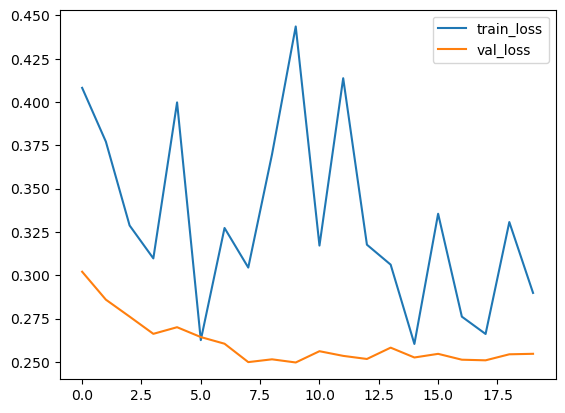

In [35]:
opt_dhs.training_log_.plot()


In [36]:
# Stratified CV
%timeit -c -n 1 -r 1
opt_dhs, opt_dhs_params, opt_dhs_search = optimize(survwrap.DeepHitSingle(rng_seed=2309),  X_train, y_train)
opt_dhs.score(X_test, y_test), opt_dhs_params

(0.49224806201550386,
 {'batch_size': 16,
  'epochs': 100,
  'layer_sizes': [24, 24, 24],
  'num_durations': 10,
  'validation_size': 0.1})

In [38]:
survwrap.get_top_models(opt_dhs_search)

[(1,
  0.679903369304171,
  0.06130404960108424,
  {'batch_size': 16,
   'epochs': 100,
   'layer_sizes': [24, 24, 24],
   'num_durations': 10,
   'validation_size': 0.1}),
 (2,
  0.6751875391777484,
  0.06698878529817202,
  {'batch_size': 32,
   'epochs': 100,
   'layer_sizes': [24, 24, 24],
   'num_durations': 10,
   'validation_size': 0.1}),
 (3,
  0.6379099492484774,
  0.09406721806301618,
  {'batch_size': 16,
   'epochs': 100,
   'layer_sizes': [11, 11],
   'num_durations': 10,
   'validation_size': 0.1}),
 (4,
  0.6258859182112918,
  0.09973355846102765,
  {'batch_size': 32,
   'epochs': 100,
   'layer_sizes': [11, 11],
   'num_durations': 10,
   'validation_size': 0.1}),
 (5,
  0.6234481888778655,
  0.07697892424340054,
  {'batch_size': 16,
   'epochs': 100,
   'layer_sizes': [11],
   'num_durations': 10,
   'validation_size': 0.1}),
 (6,
  0.6173458743669213,
  0.09644734884390095,
  {'batch_size': 32,
   'epochs': 100,
   'layer_sizes': [24, 24],
   'num_durations': 10,
   'va

<Axes: >

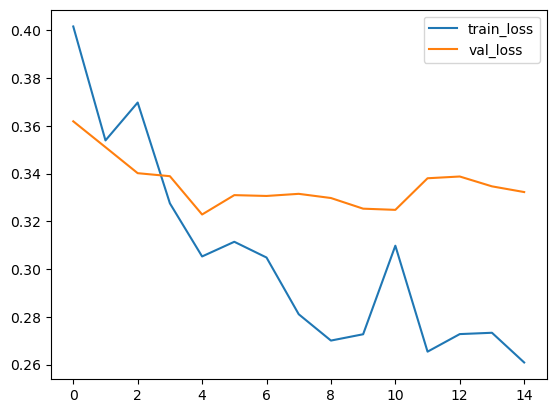

In [39]:
opt_dhs.training_log_.plot()
